In [25]:
# Useful starting lines
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from core.data_preparation import *
from core.data_preprocessing import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
data_path = '../data/'

In [27]:
tr_data, test_data = dataloader(data_path)

In [28]:
from tools.helpers import build_poly
print(tr_data["x_train"].shape)
x_poly = build_poly(tr_data["x_train"], 3)
print(x_poly.shape)

(250000, 30)
(250000, 91)


In [29]:
def read_feature_names(path):
    with open(path) as f:
        header = f.readline()
    return header.strip().split(',')[2:] # first 2 are id and prediction, ignore them

In [30]:
tr_feat = read_feature_names(os.path.join(data_path, "train.csv"))

In [19]:
print(len(tr_feat))
print(tr_feat)

30
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


In [20]:
test_feat = read_feature_names(os.path.join(data_path, "train.csv"))

In [21]:
print(len(test_feat))
print(test_feat)

30
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


In [22]:
print(tr_data['y_train'][:10])

[1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


In [23]:
print(tr_data['x_train'][:10])

[[ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
   1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
   1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
   3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
  -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
   4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02]
 [ 1.60937e+02  6.87680e+01  1.03235e+02  4.81460e+01 -9.99000e+02
  -9.99000e+02 -9.99000e+02  3.47300e+00  2.07800e+00  1.25157e+02
   8.79000e-01  1.41400e+00 -9.99000e+02  4.20140e+01  2.03900e+00
  -3.01100e+00  3.69180e+01  5.01000e-01  1.03000e-01  4.47040e+01
  -1.91600e+00  1.64546e+02  1.00000e+00  4.62260e+01  7.25000e-01
   1.15800e+00 -9.99000e+02 -9.99000e+02 -9.99000e+02  4.62260e+01]
 [-9.99000e+02  1.62172e+02  1.25953e+02  3.56350e+01 -9.99000e+02
  -9.99000e+02 -9.99000e+02  3.14800e+00  9.33600e+00  1.97814e+02
   3.77600e+00  1.41400e+00 -9.99000e+02  3.21540e+01 -7.050

In [52]:
def plot_features_distrib(x):
    plt.figure(figsize=(15,30))
    for i in range(x.shape[1]):
        plt.subplot(10, 3, i+1)
        plt.hist(x[:,i])#, bins=50)
        plt.yscale('log')
        plt.title("Feature {}: {}".format(i, tr_feat[i]))
    plt.tight_layout()
    plt.show()


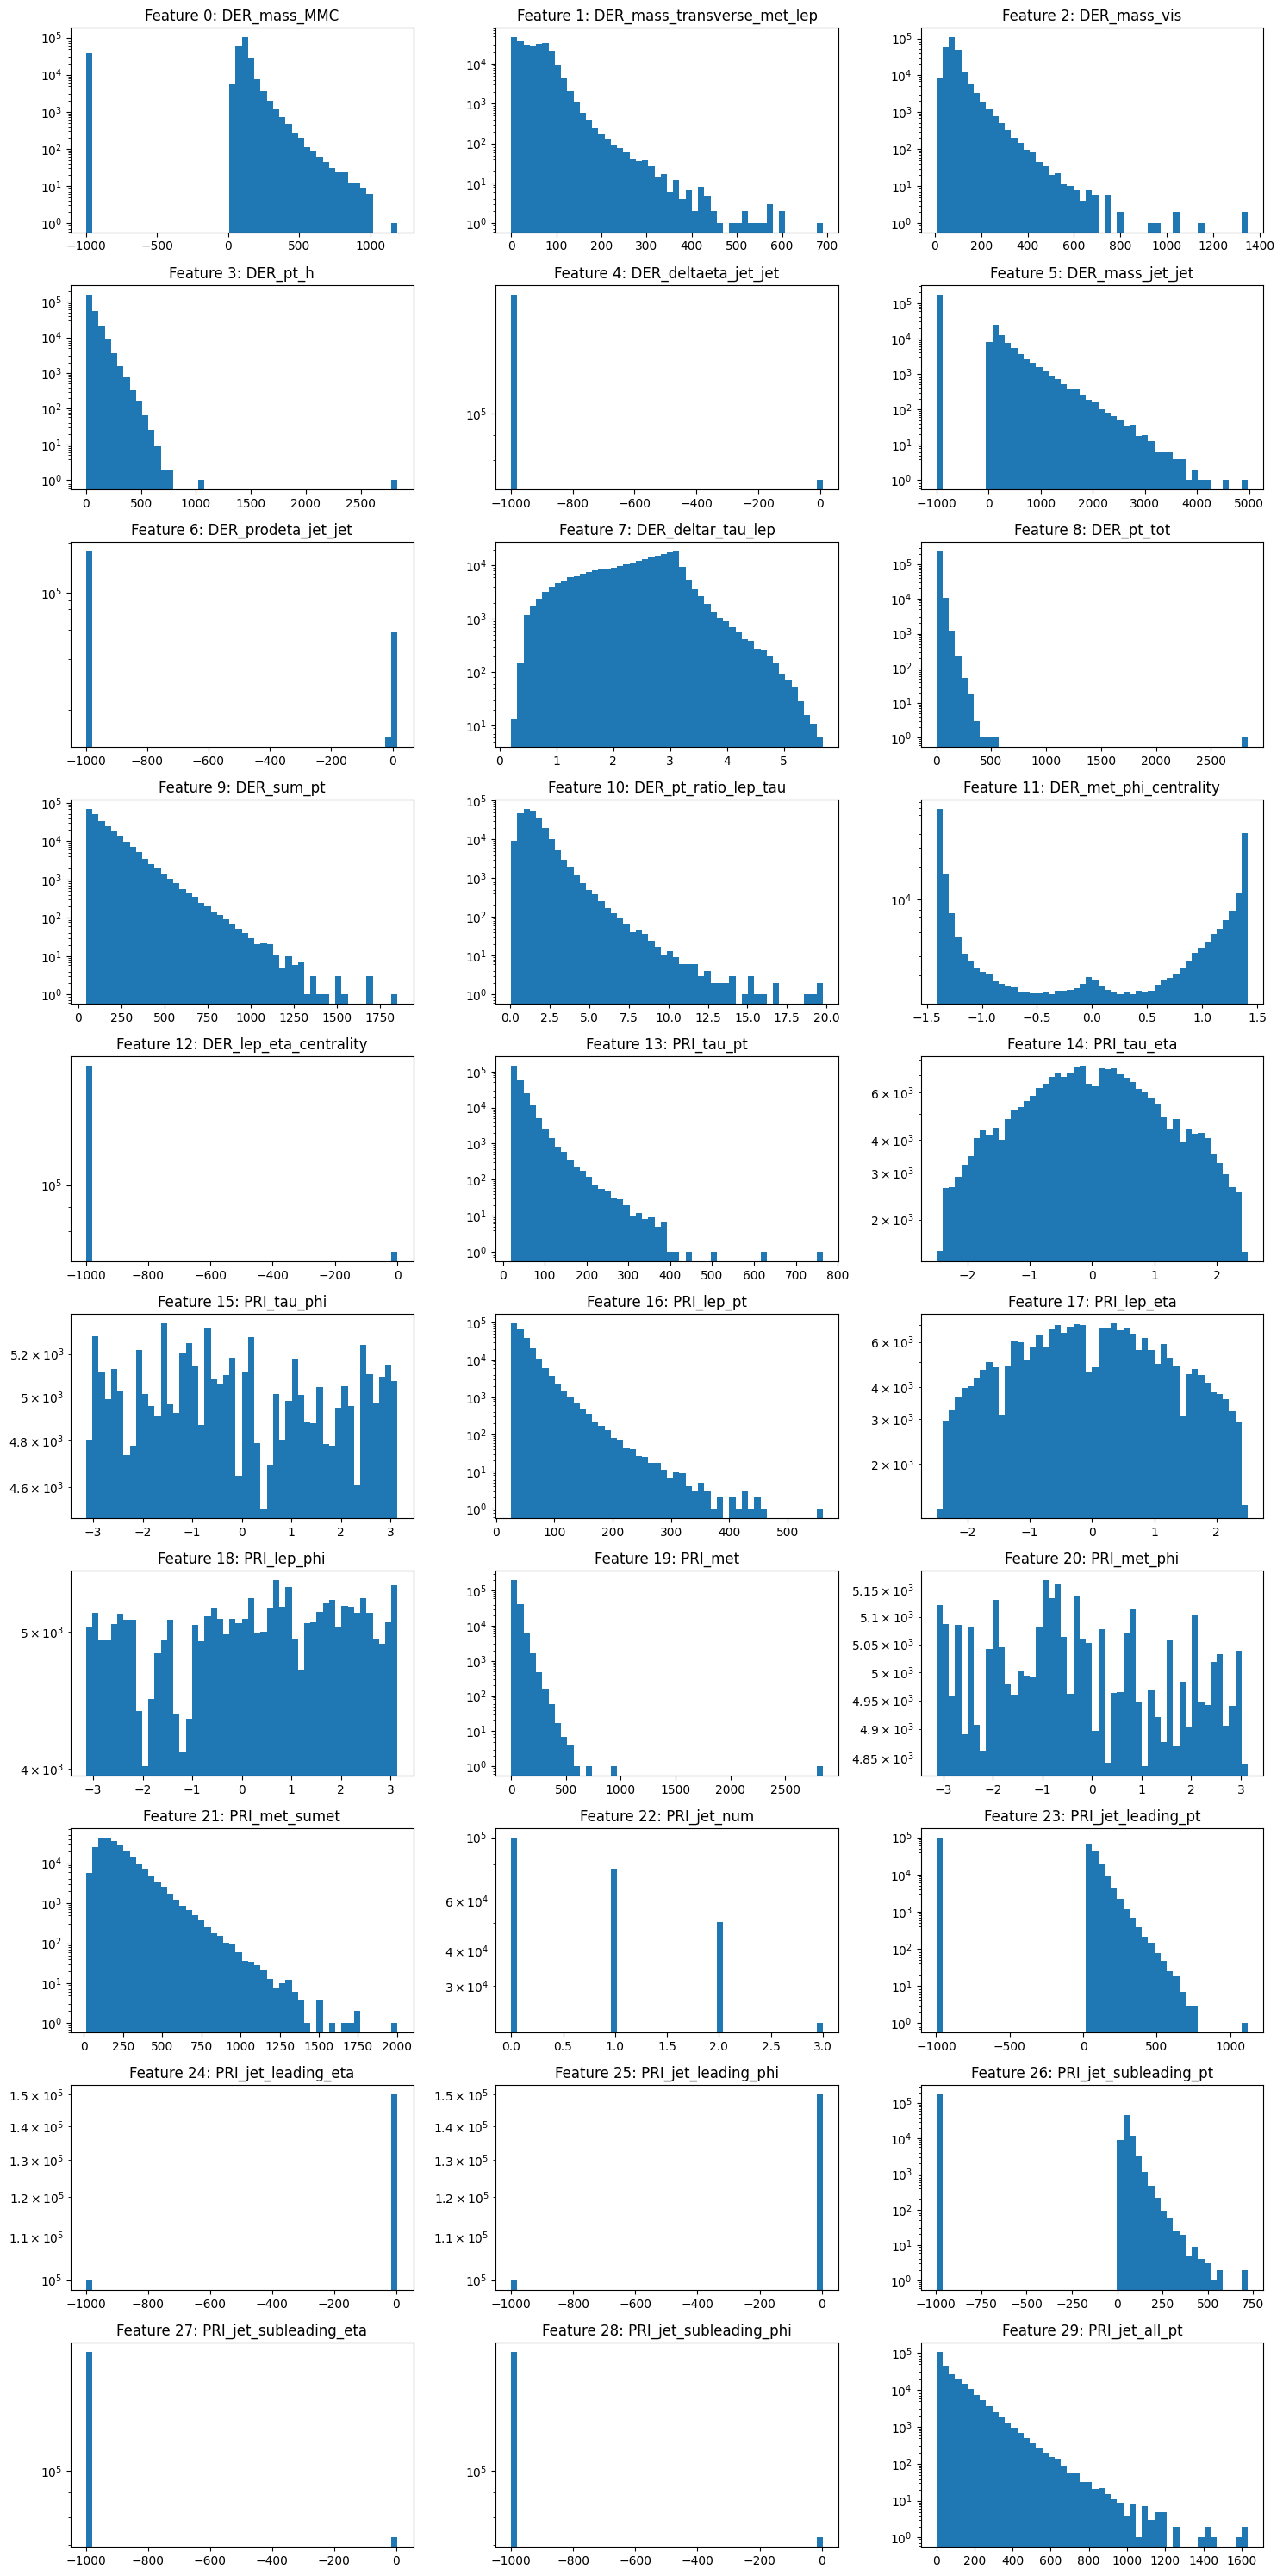

In [7]:
plot_features_distrib(tr_data['x_train'])

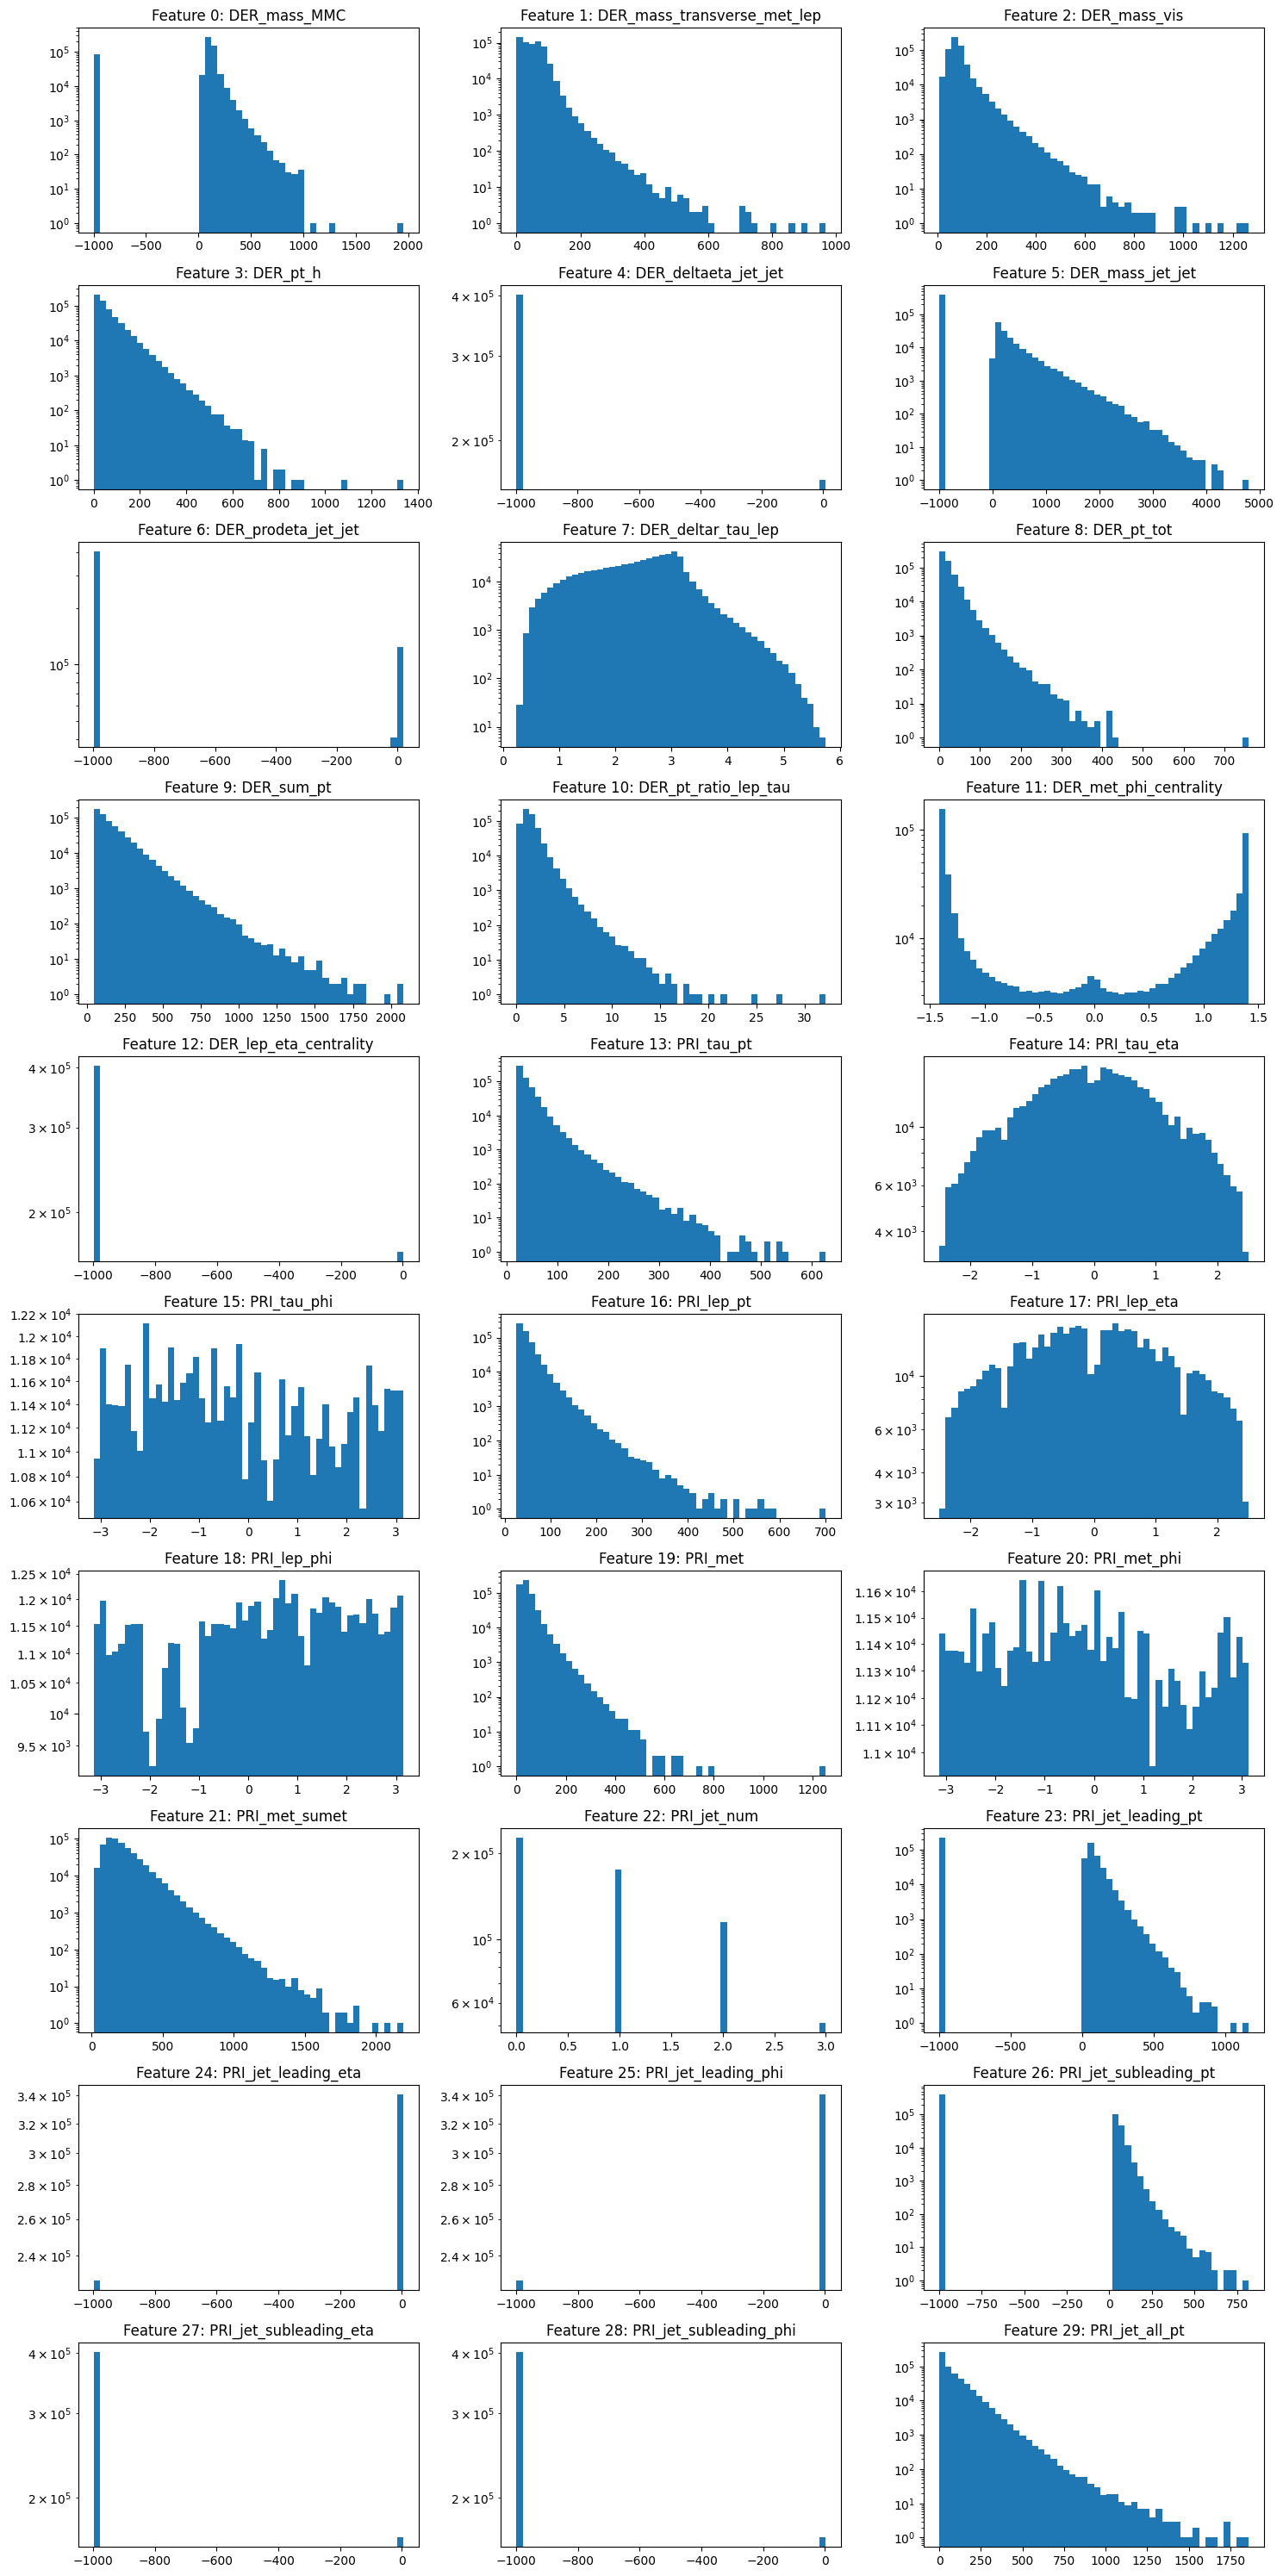

In [8]:
plot_features_distrib(test_data['x_test'])

In [20]:
 # replace -999 to nan
nan_imputer = Imputer(missing_values=-999, strategy='constant', fill_value=np.nan)
tr_data['x_train'] = nan_imputer.fit_transform(tr_data['x_train'])
test_data['x_test'] = nan_imputer.transform(test_data['x_test'])


In [21]:
# impute nan values
mean_imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
tr_data["x_train"] = mean_imputer.fit_transform(tr_data["x_train"])
test_data["x_test"] = mean_imputer.transform(test_data["x_test"])


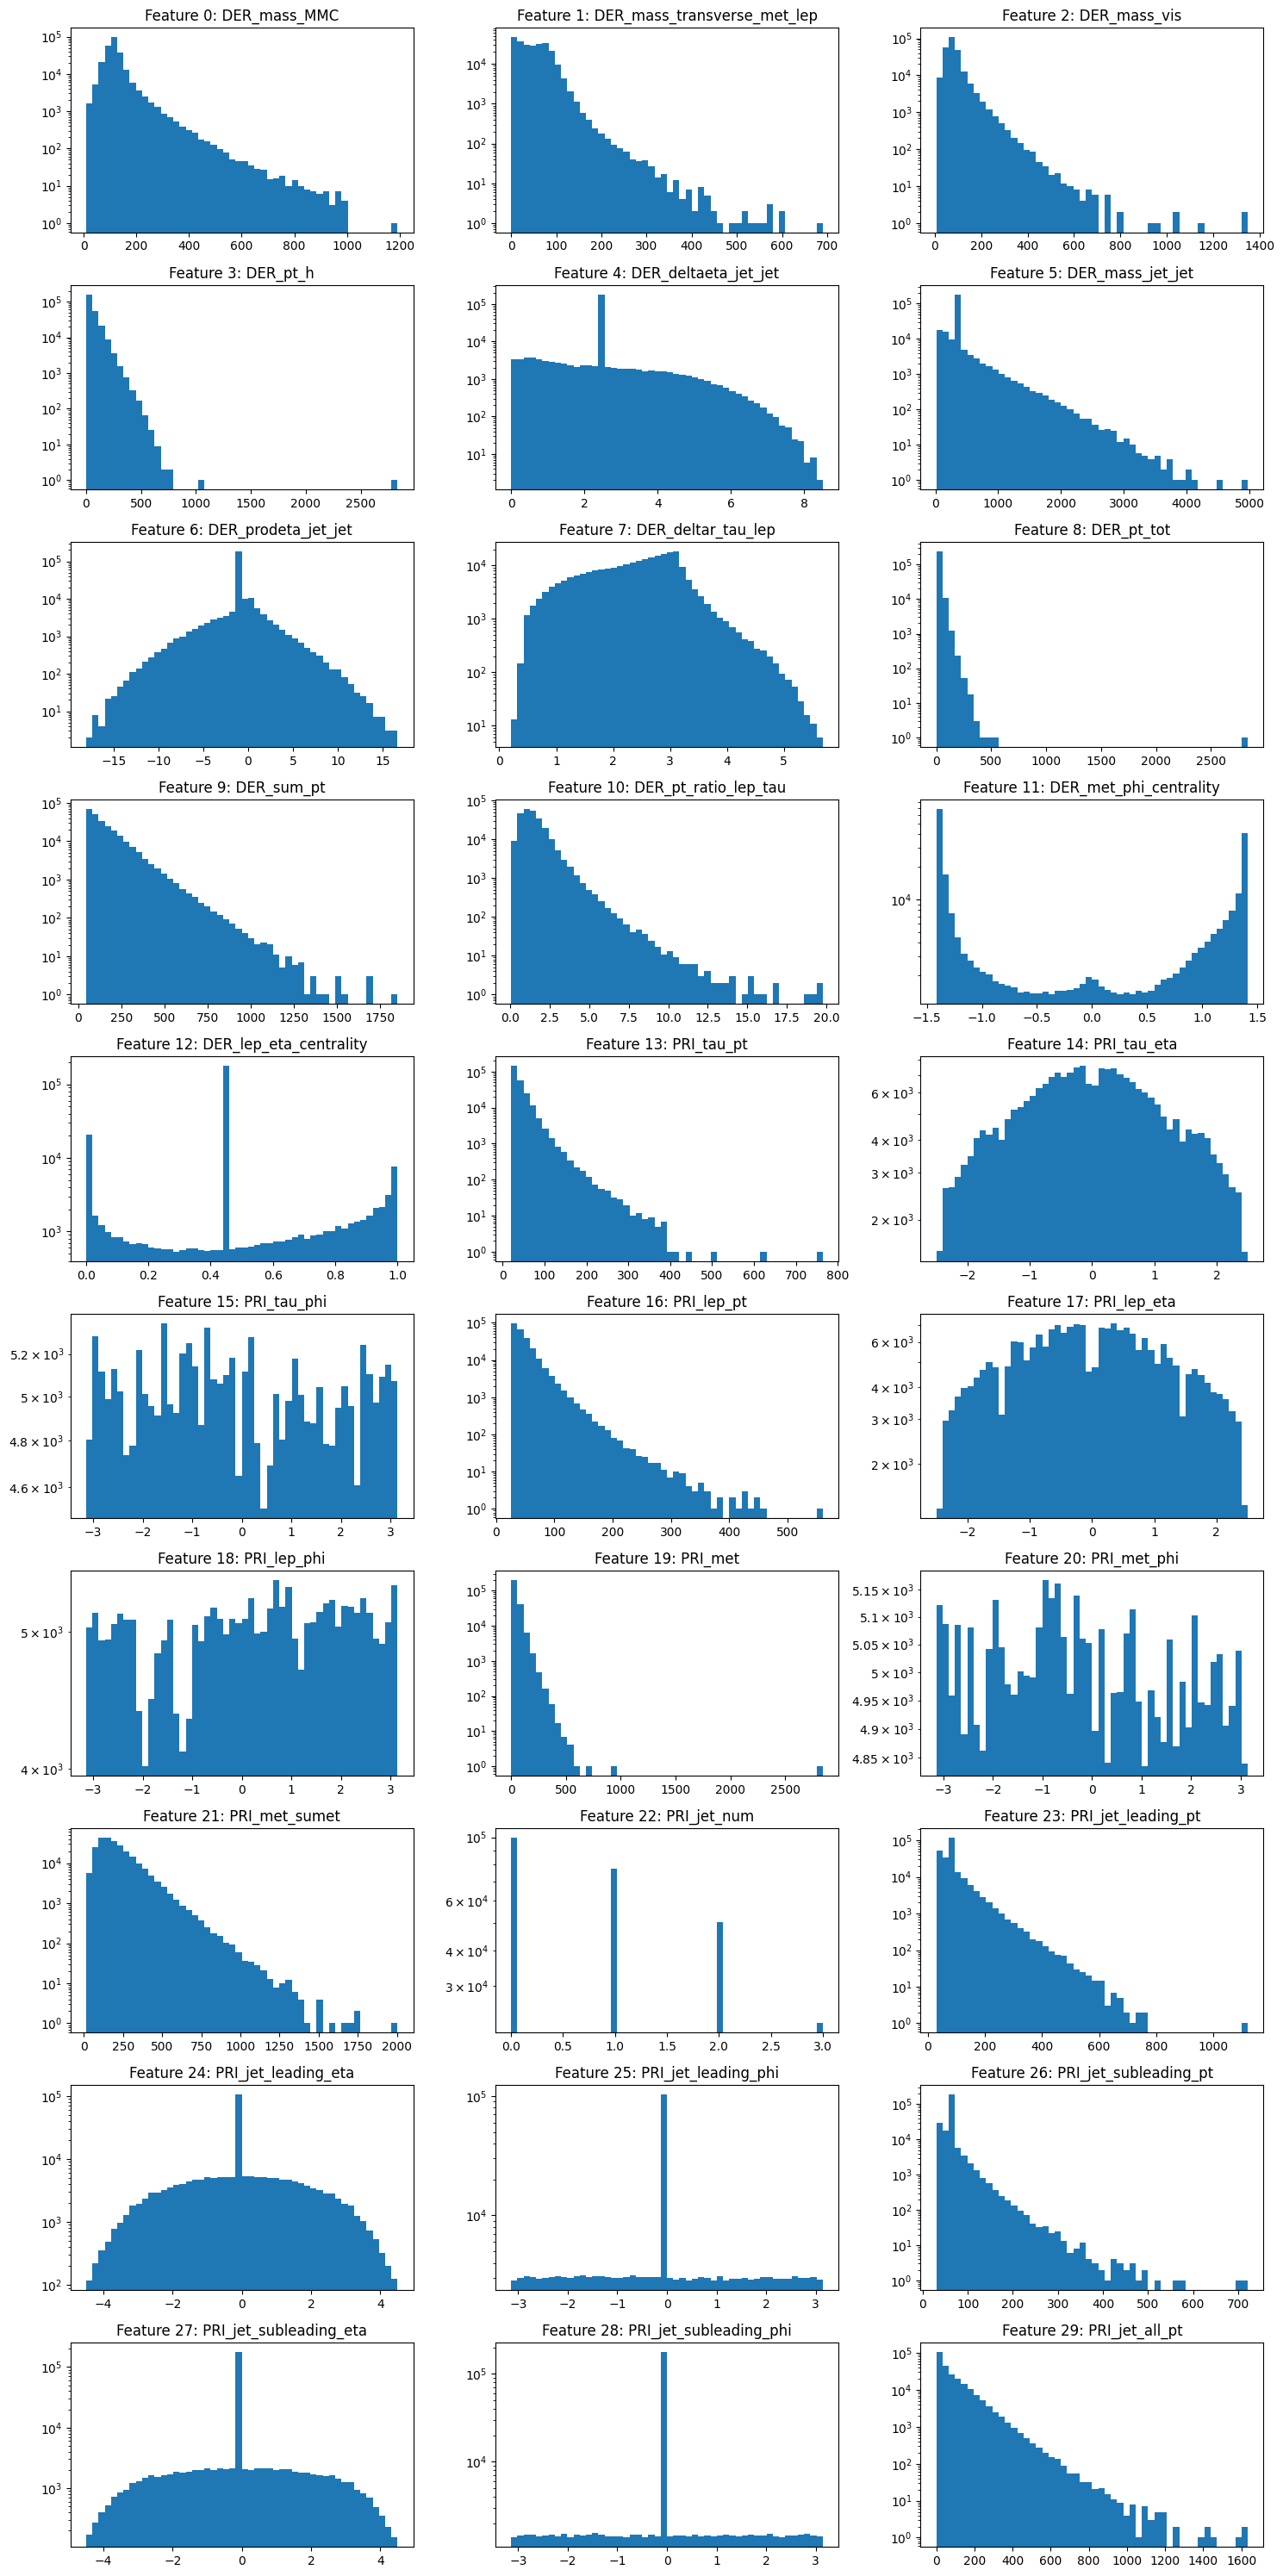

In [69]:
plot_features_distrib(tr_data['x_train'])

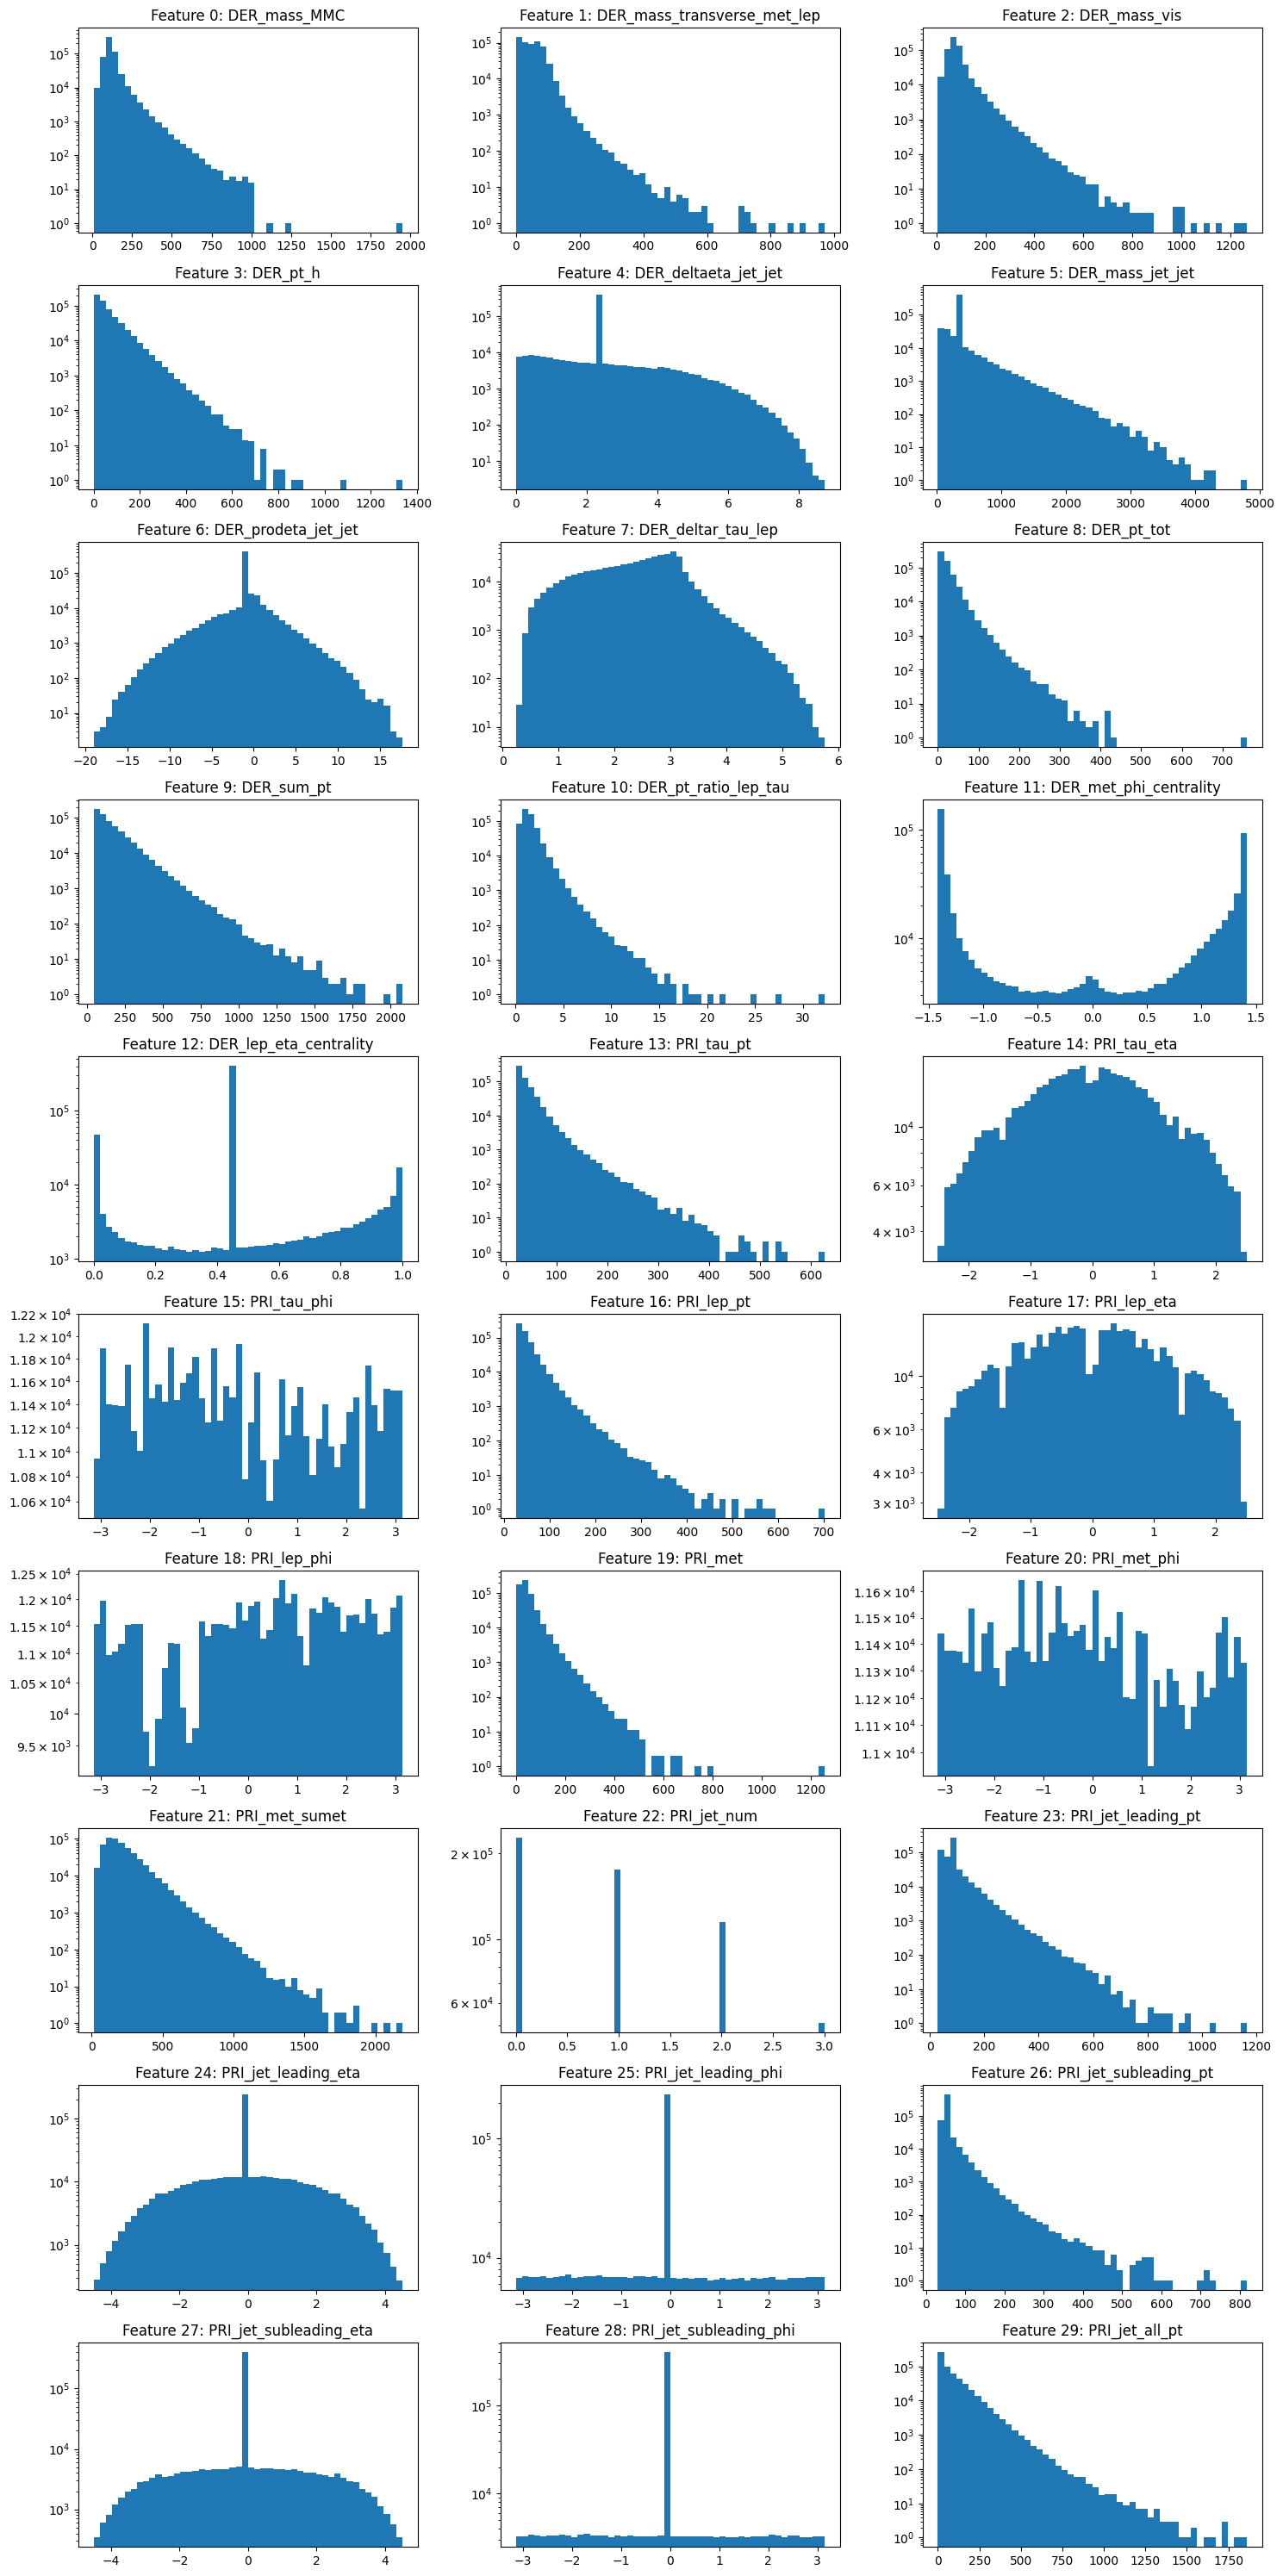

In [70]:
plot_features_distrib(test_data['x_test'])

In [12]:
# remove outliers
outlier_cols = [0, 1, 2, 3, 5, 8, 10, 13, 16, 19, 21, 23, 26, 29]
mask = remove_outliers(tr_data["x_train"], outlier_cols)
tr_data["x_train"] = tr_data["x_train"][mask]
tr_data["y_train"] = tr_data["y_train"][mask]

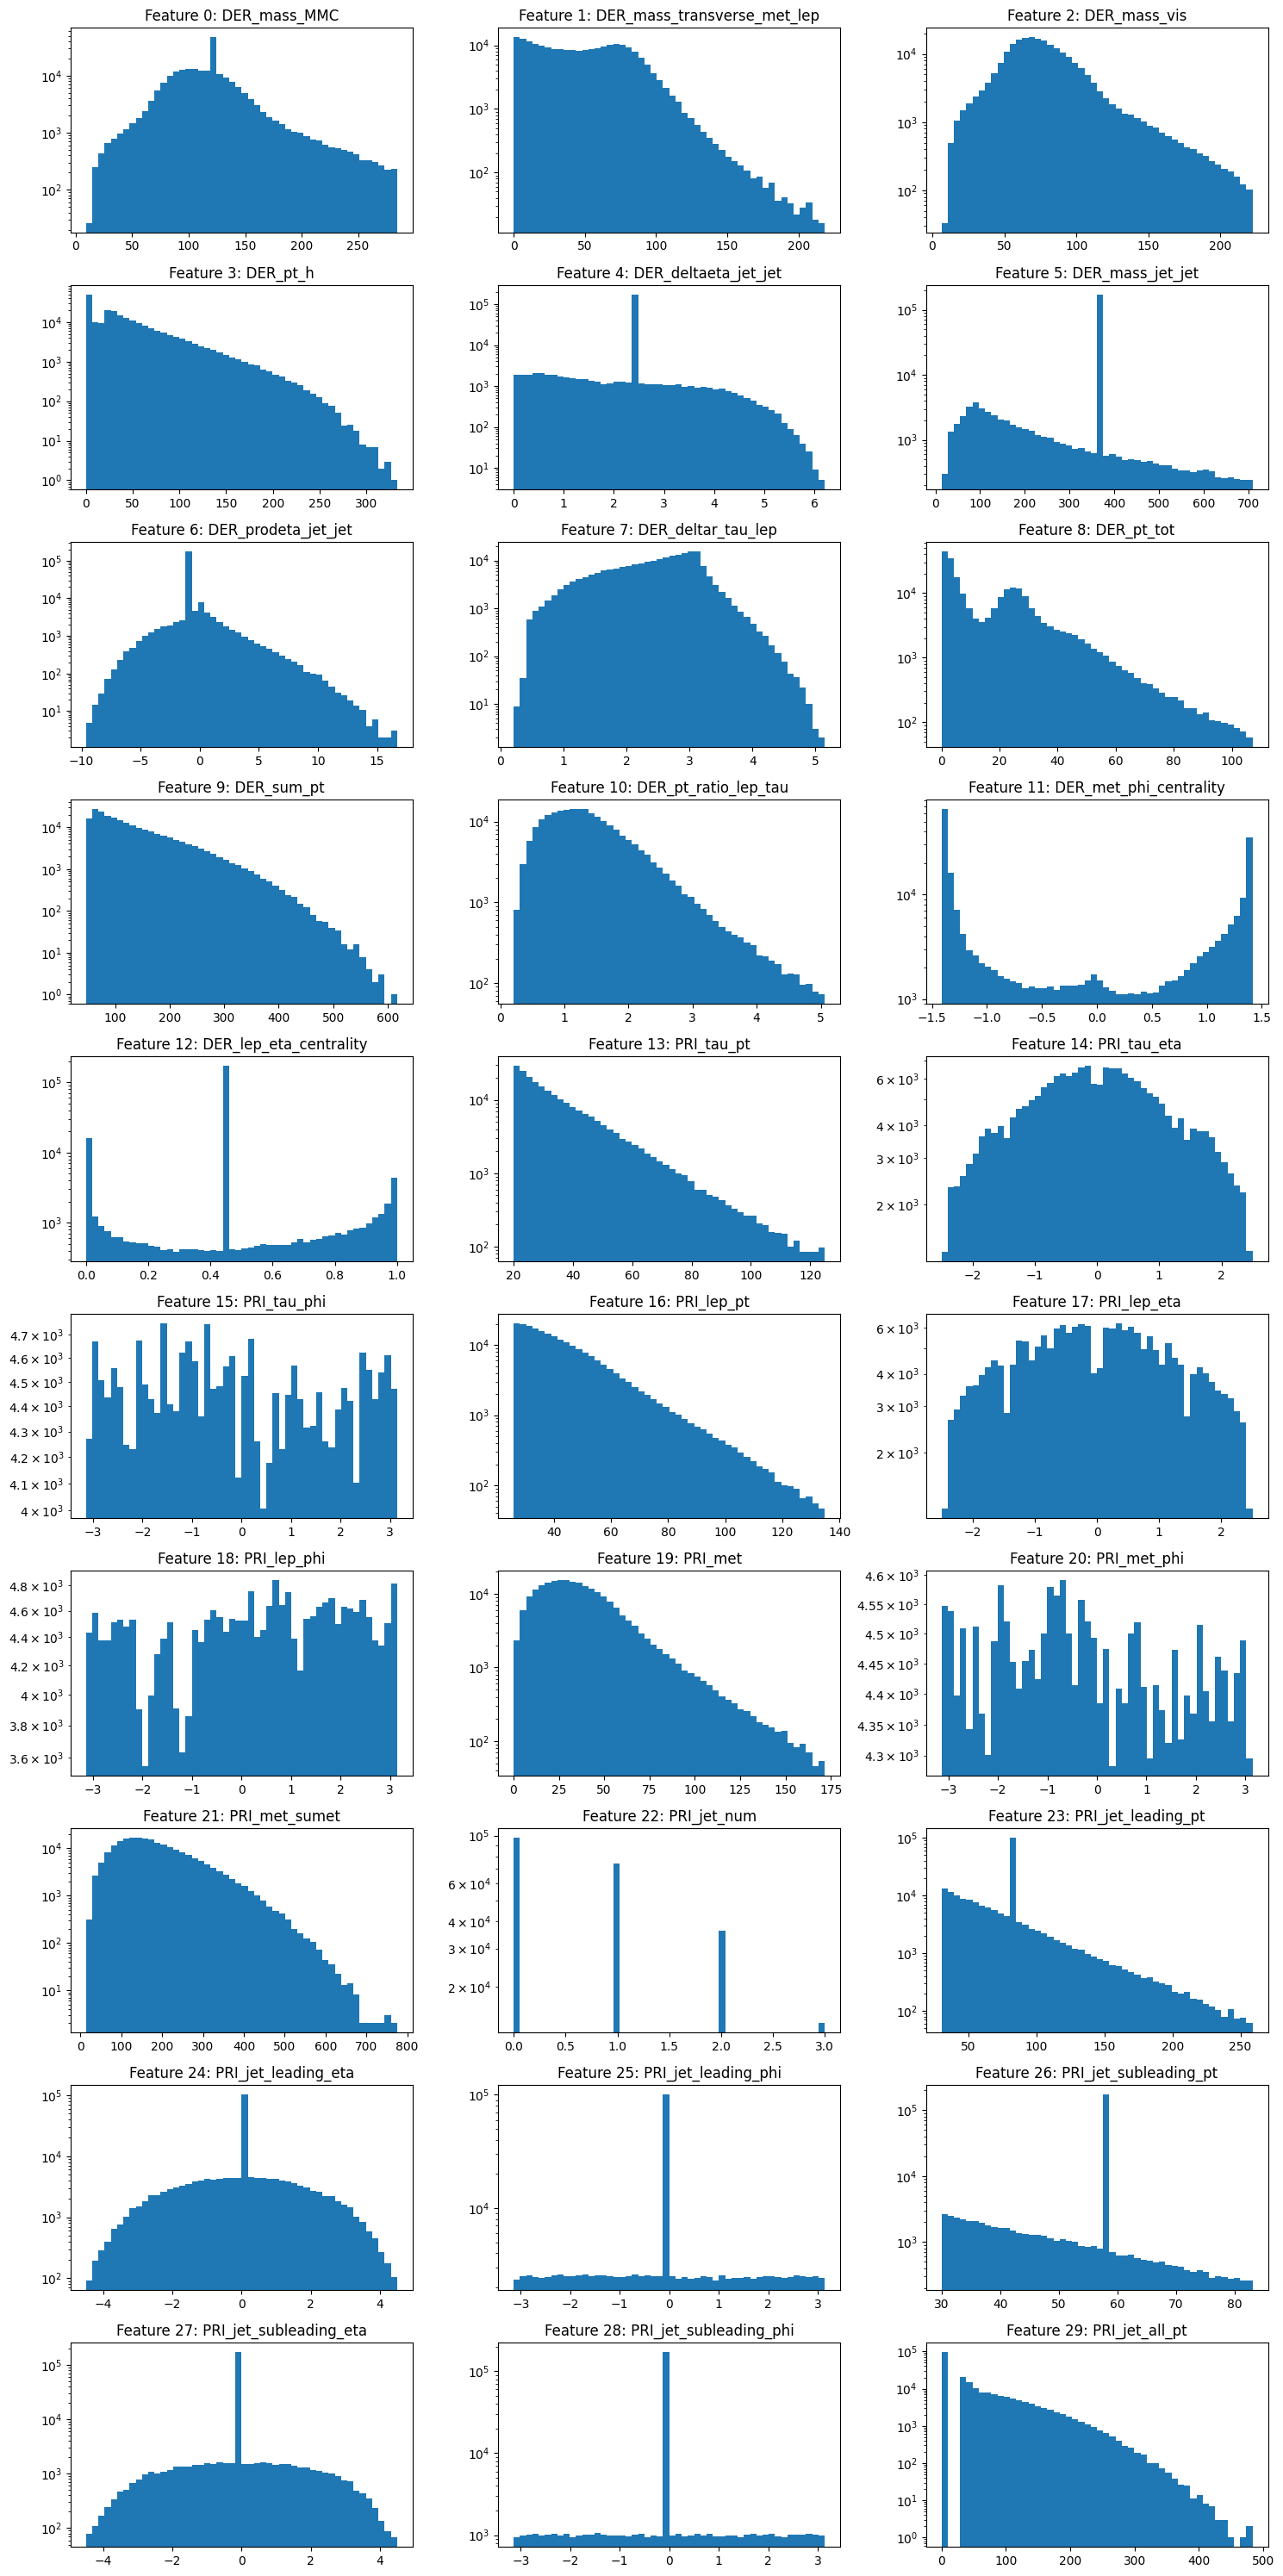

In [13]:
plot_features_distrib(tr_data['x_train'])

In [22]:
# log transformation
skewed_col = np.array([0, 1, 2, 3, 5, 8, 10, 13, 16, 19, 21, 23, 26, 29])
tr_data["x_train"] = log_transform(tr_data["x_train"], skewed_col)
test_data["x_test"] = log_transform(test_data["x_test"], skewed_col)

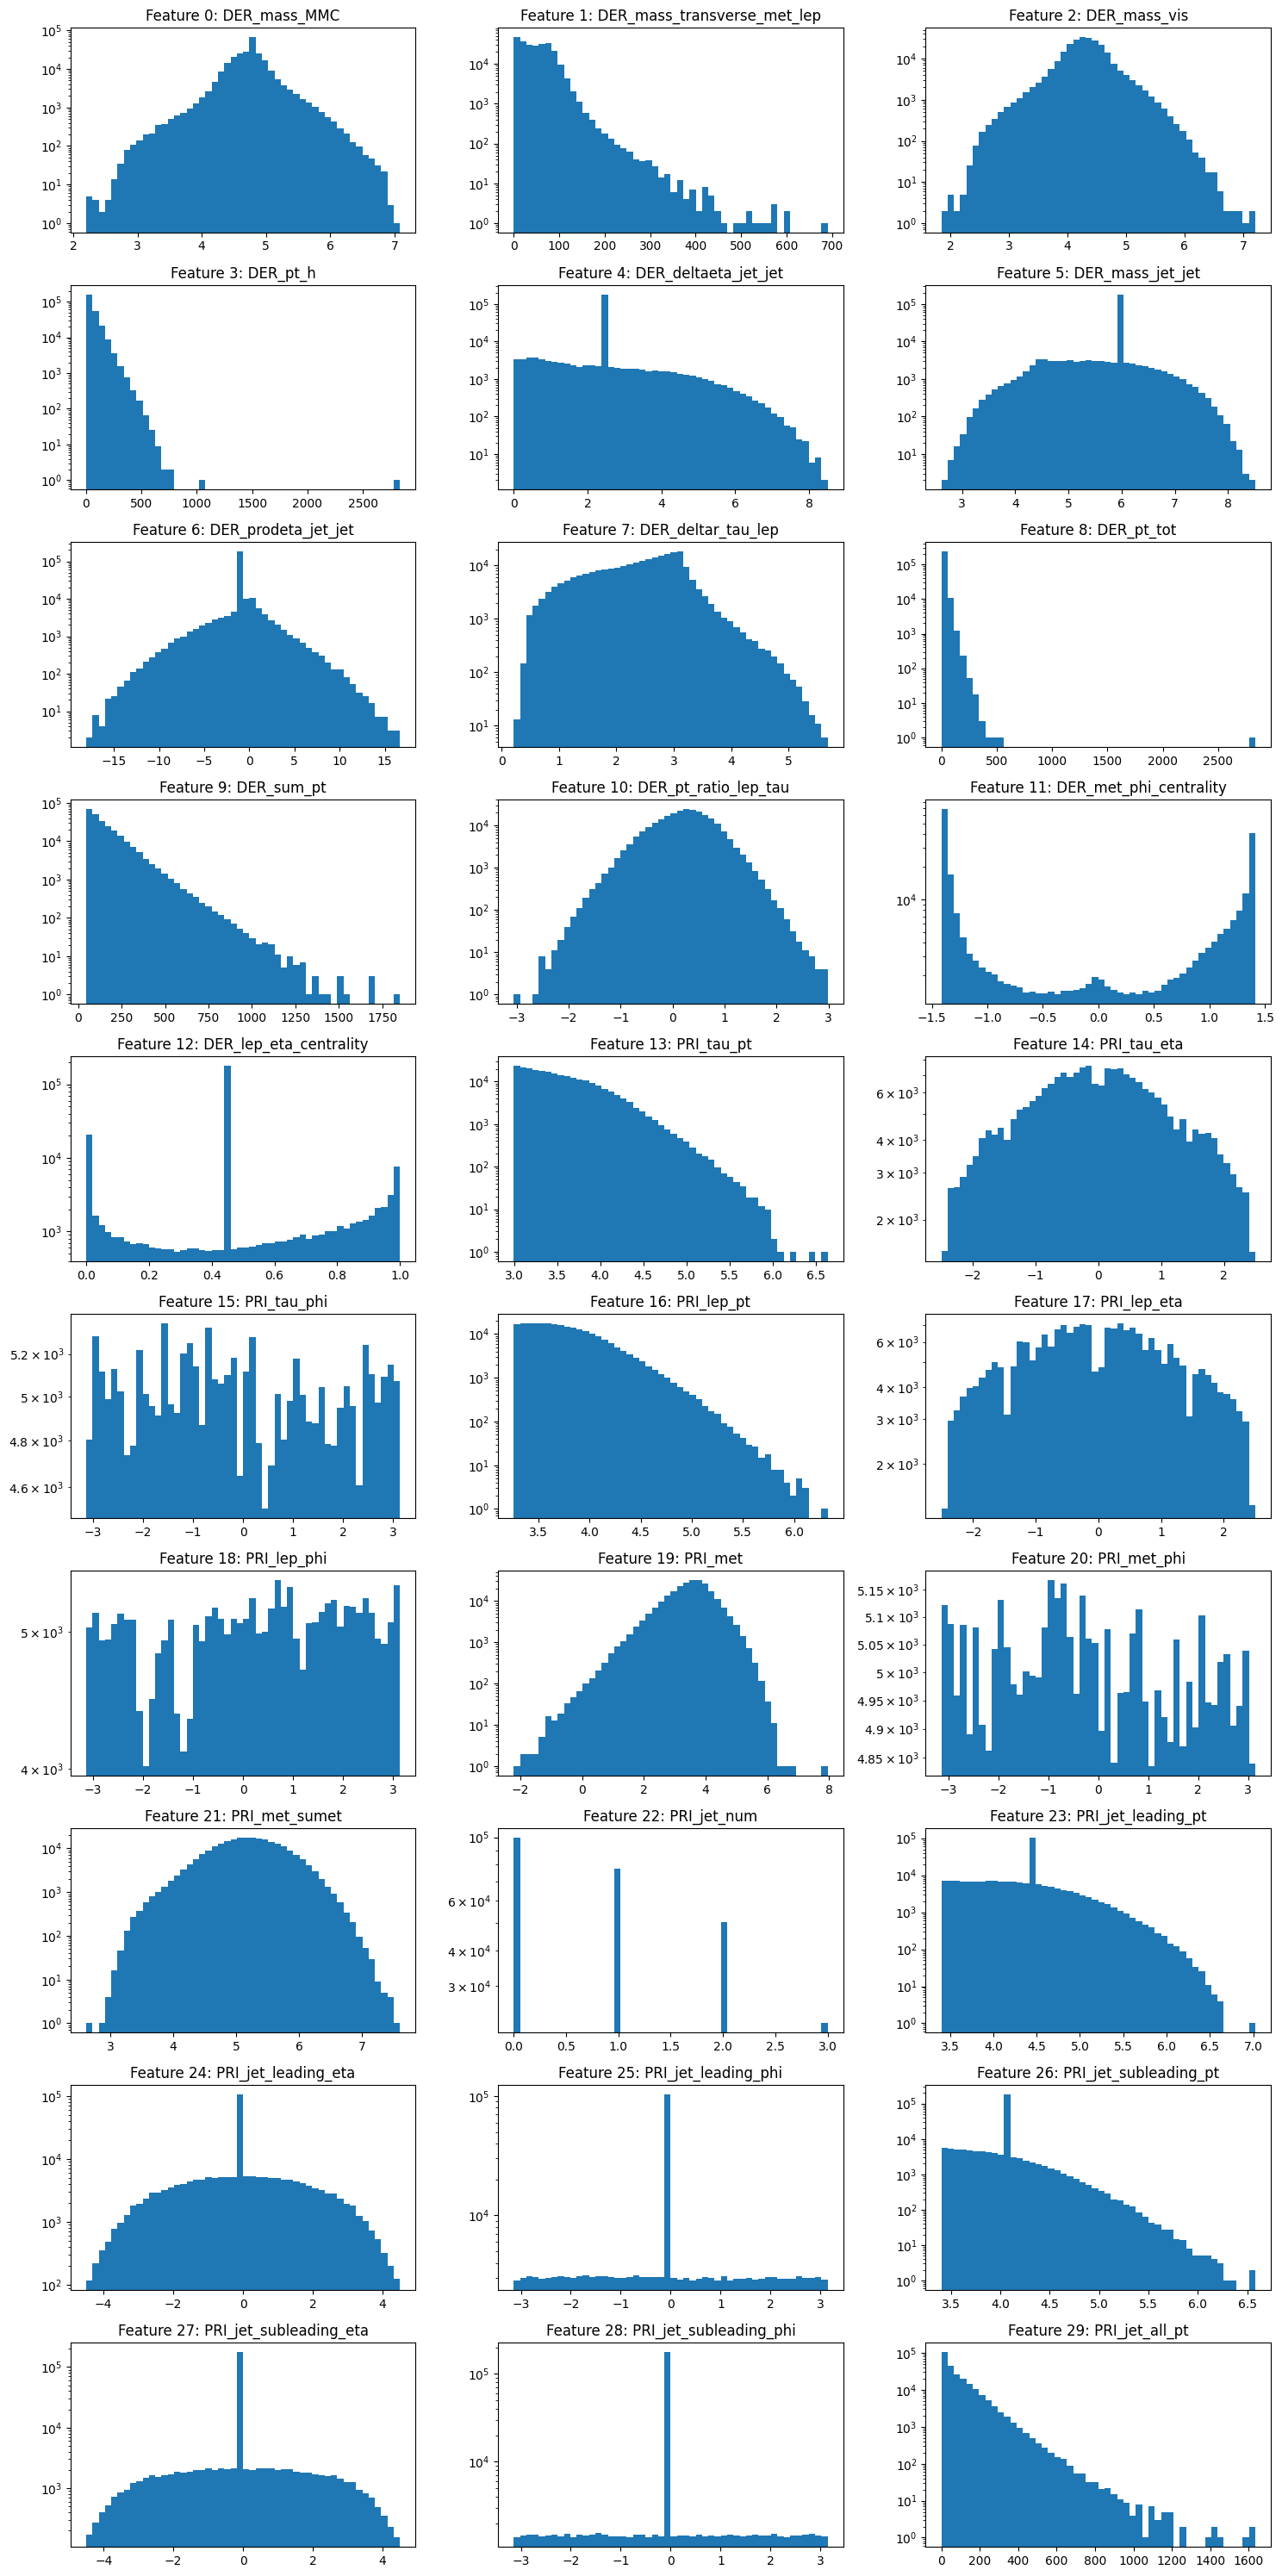

In [23]:
plot_features_distrib(tr_data['x_train'])

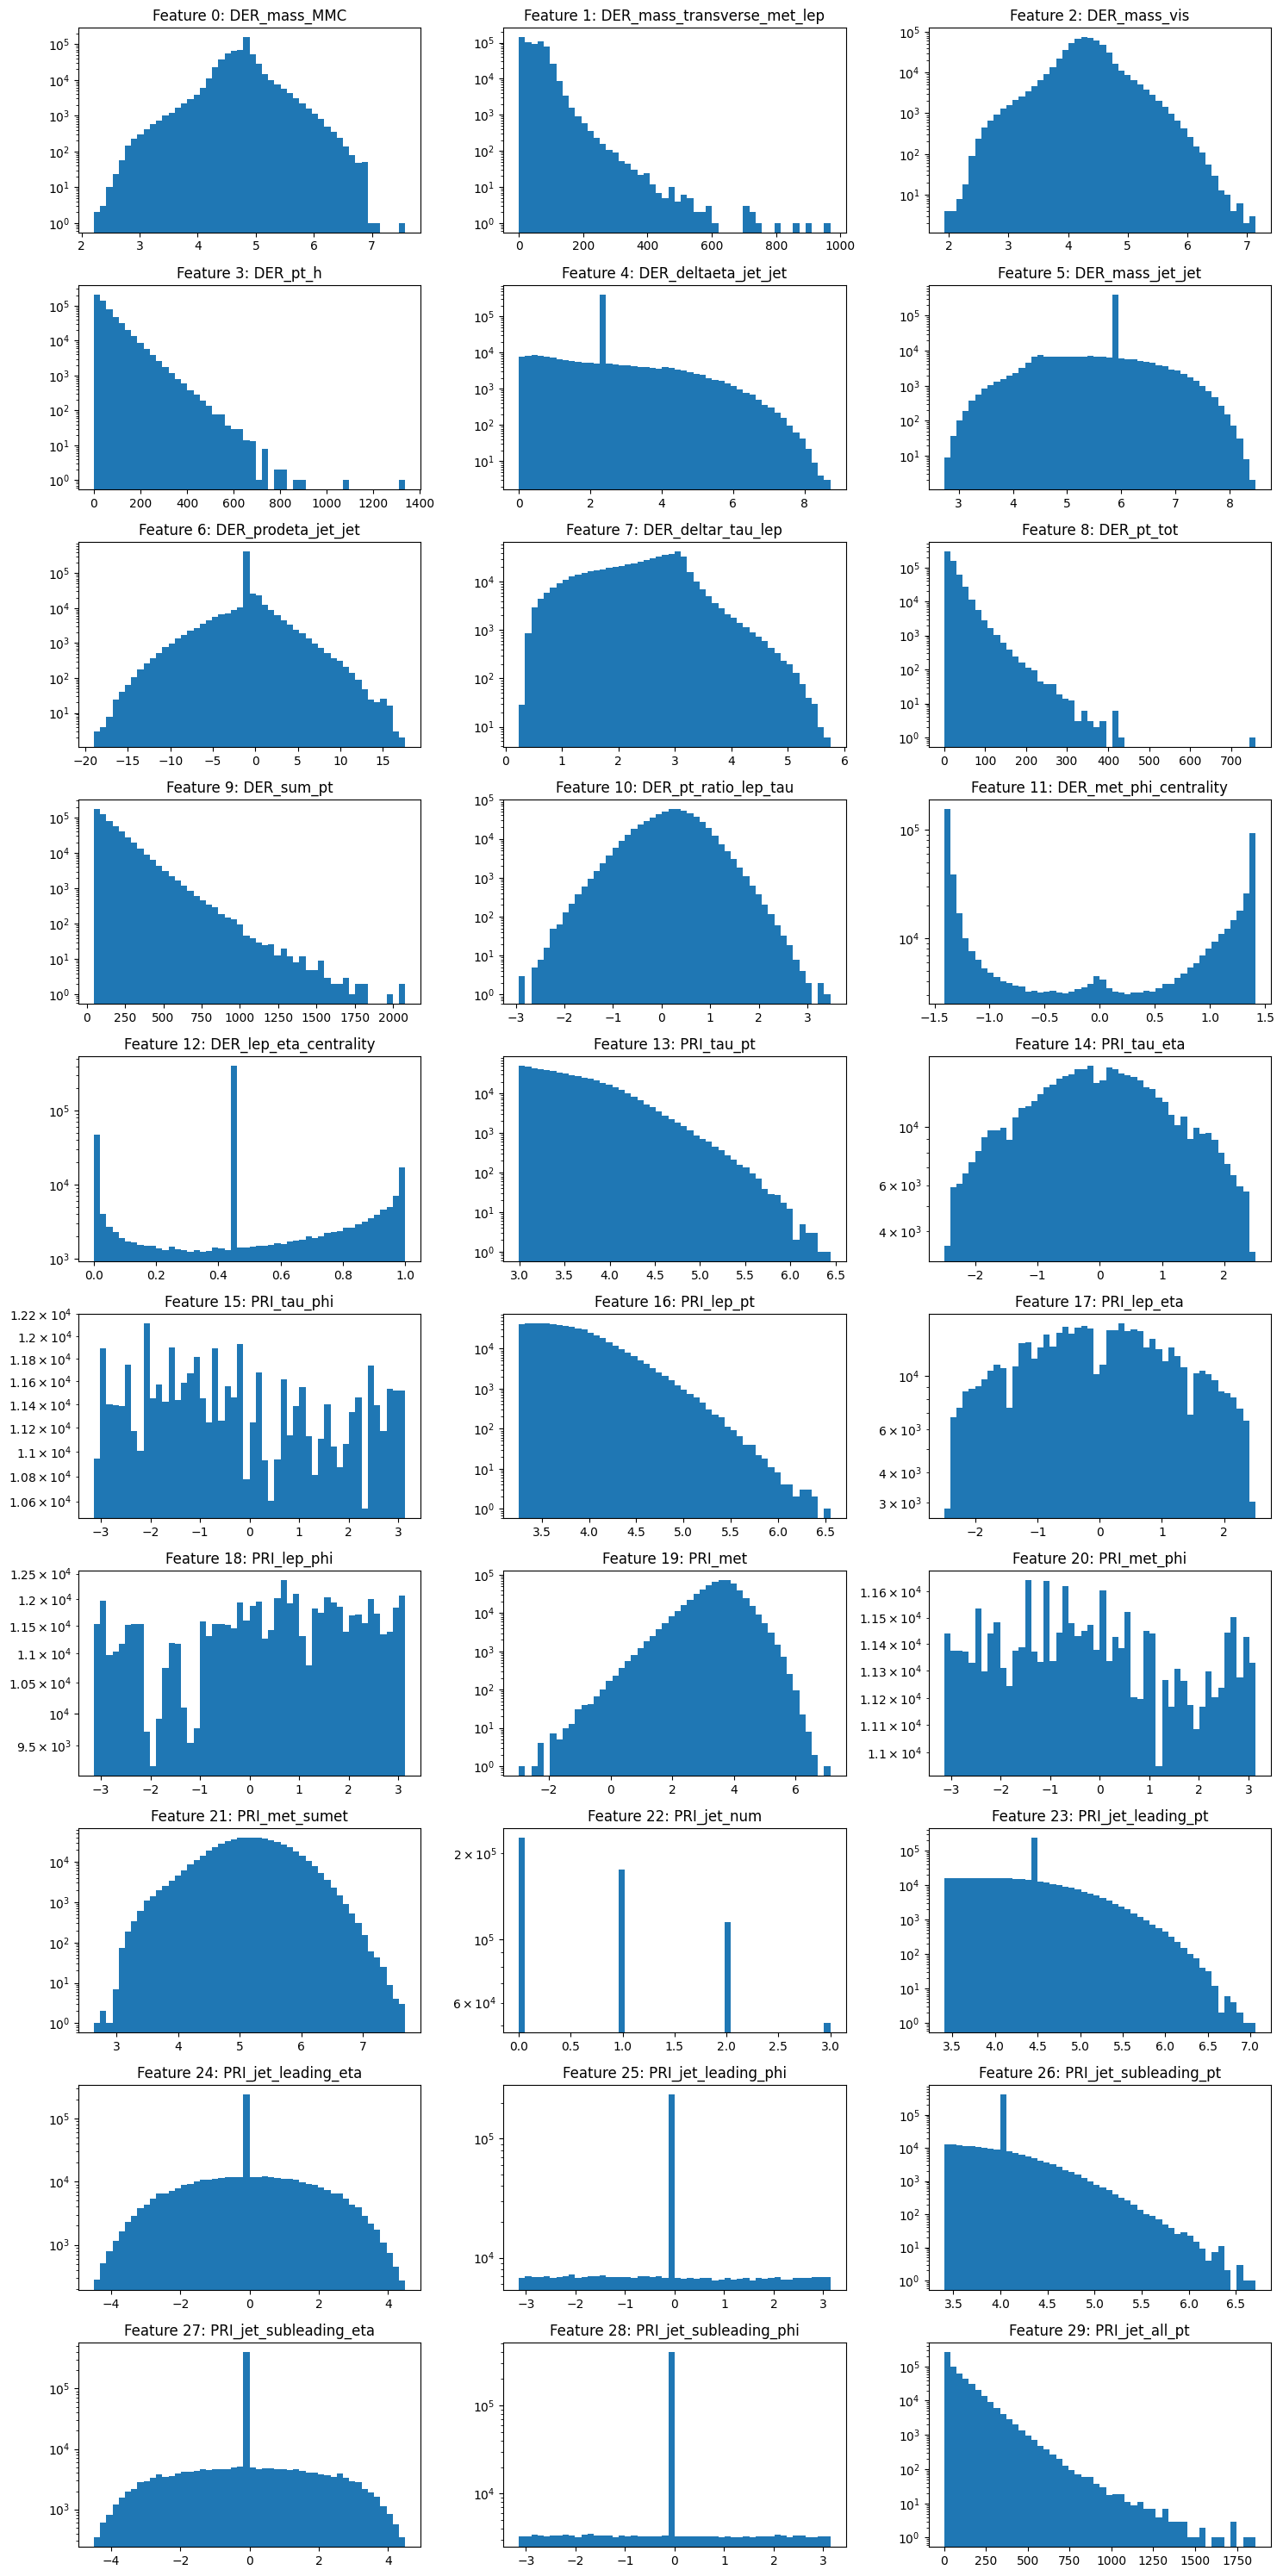

In [24]:
plot_features_distrib(test_data["x_test"])

In [75]:
# print(np.all(np.isnan(tr_data['x_train'])))
print(tr_data["x_train"].shape)
print(np.mean(tr_data["x_train"], axis=0).shape)

(250000, 30)
(30,)


In [76]:
# print(np.all(np.isnan(test_data['x_test'])))
print(test_data["x_test"].shape)
print(np.mean(test_data["x_test"], axis=0).shape)

(568238, 30)
(30,)


In [78]:
tr_data["x_train"], mean_train, std_train = normalize_data(tr_data["x_train"])
test_data["x_test"], _, _ = normalize_data(test_data["x_test"], mean_train, std_train)

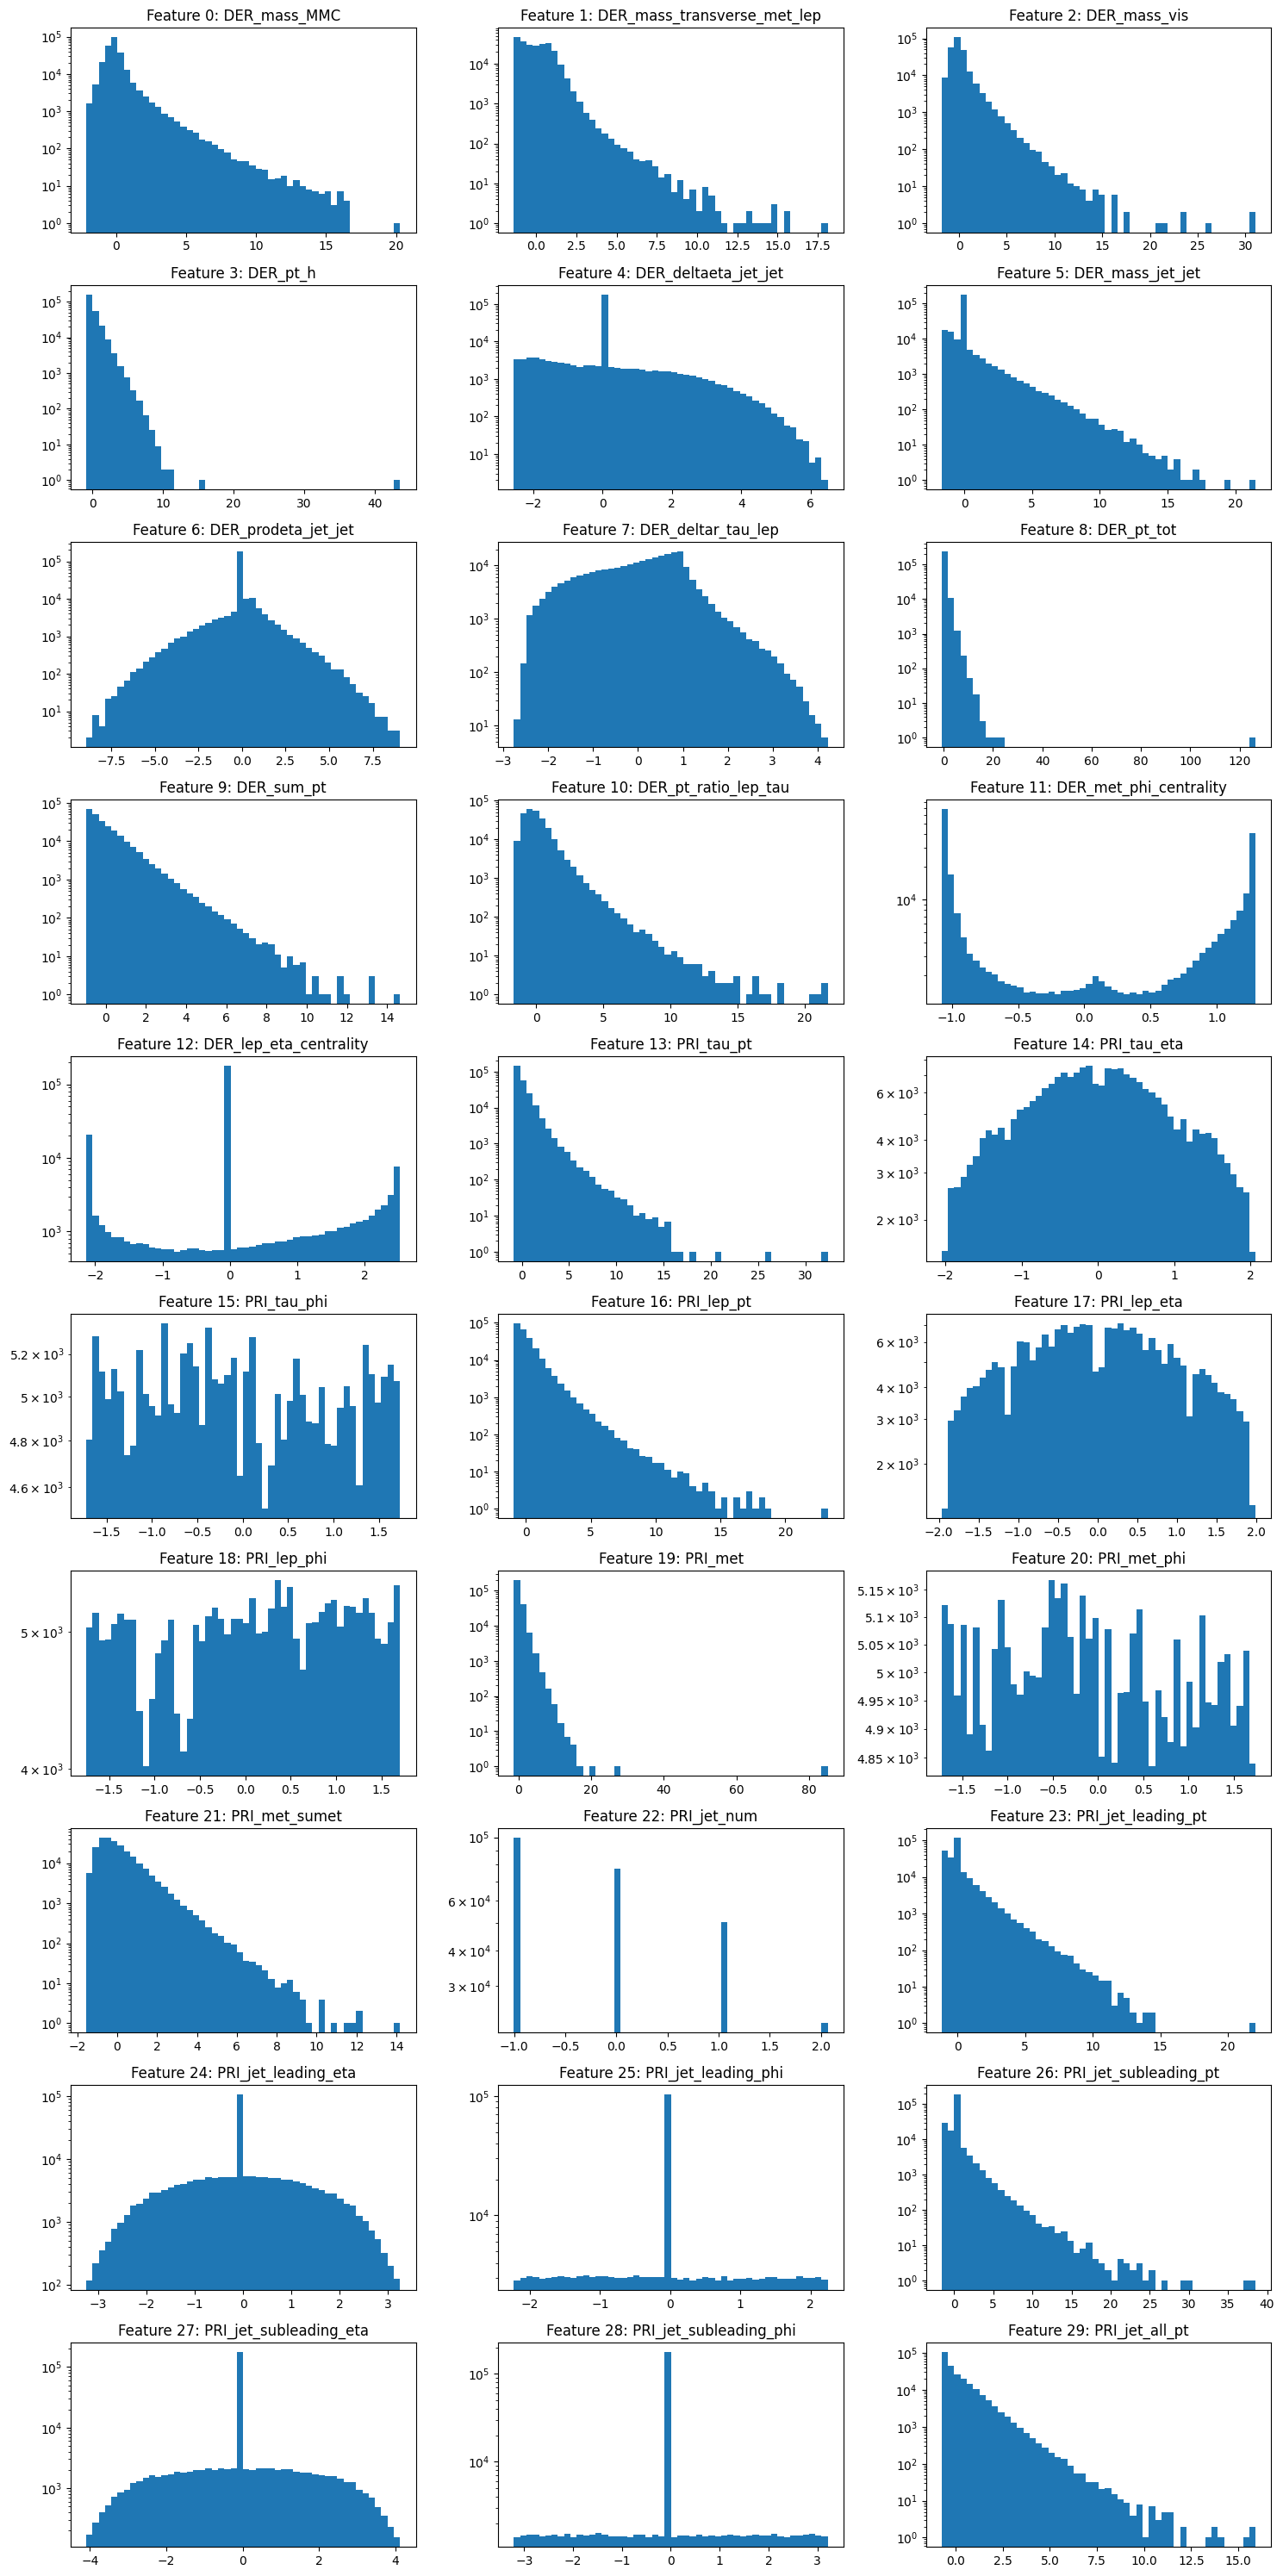

In [79]:
plot_features_distrib(tr_data['x_train'][:, 1:])

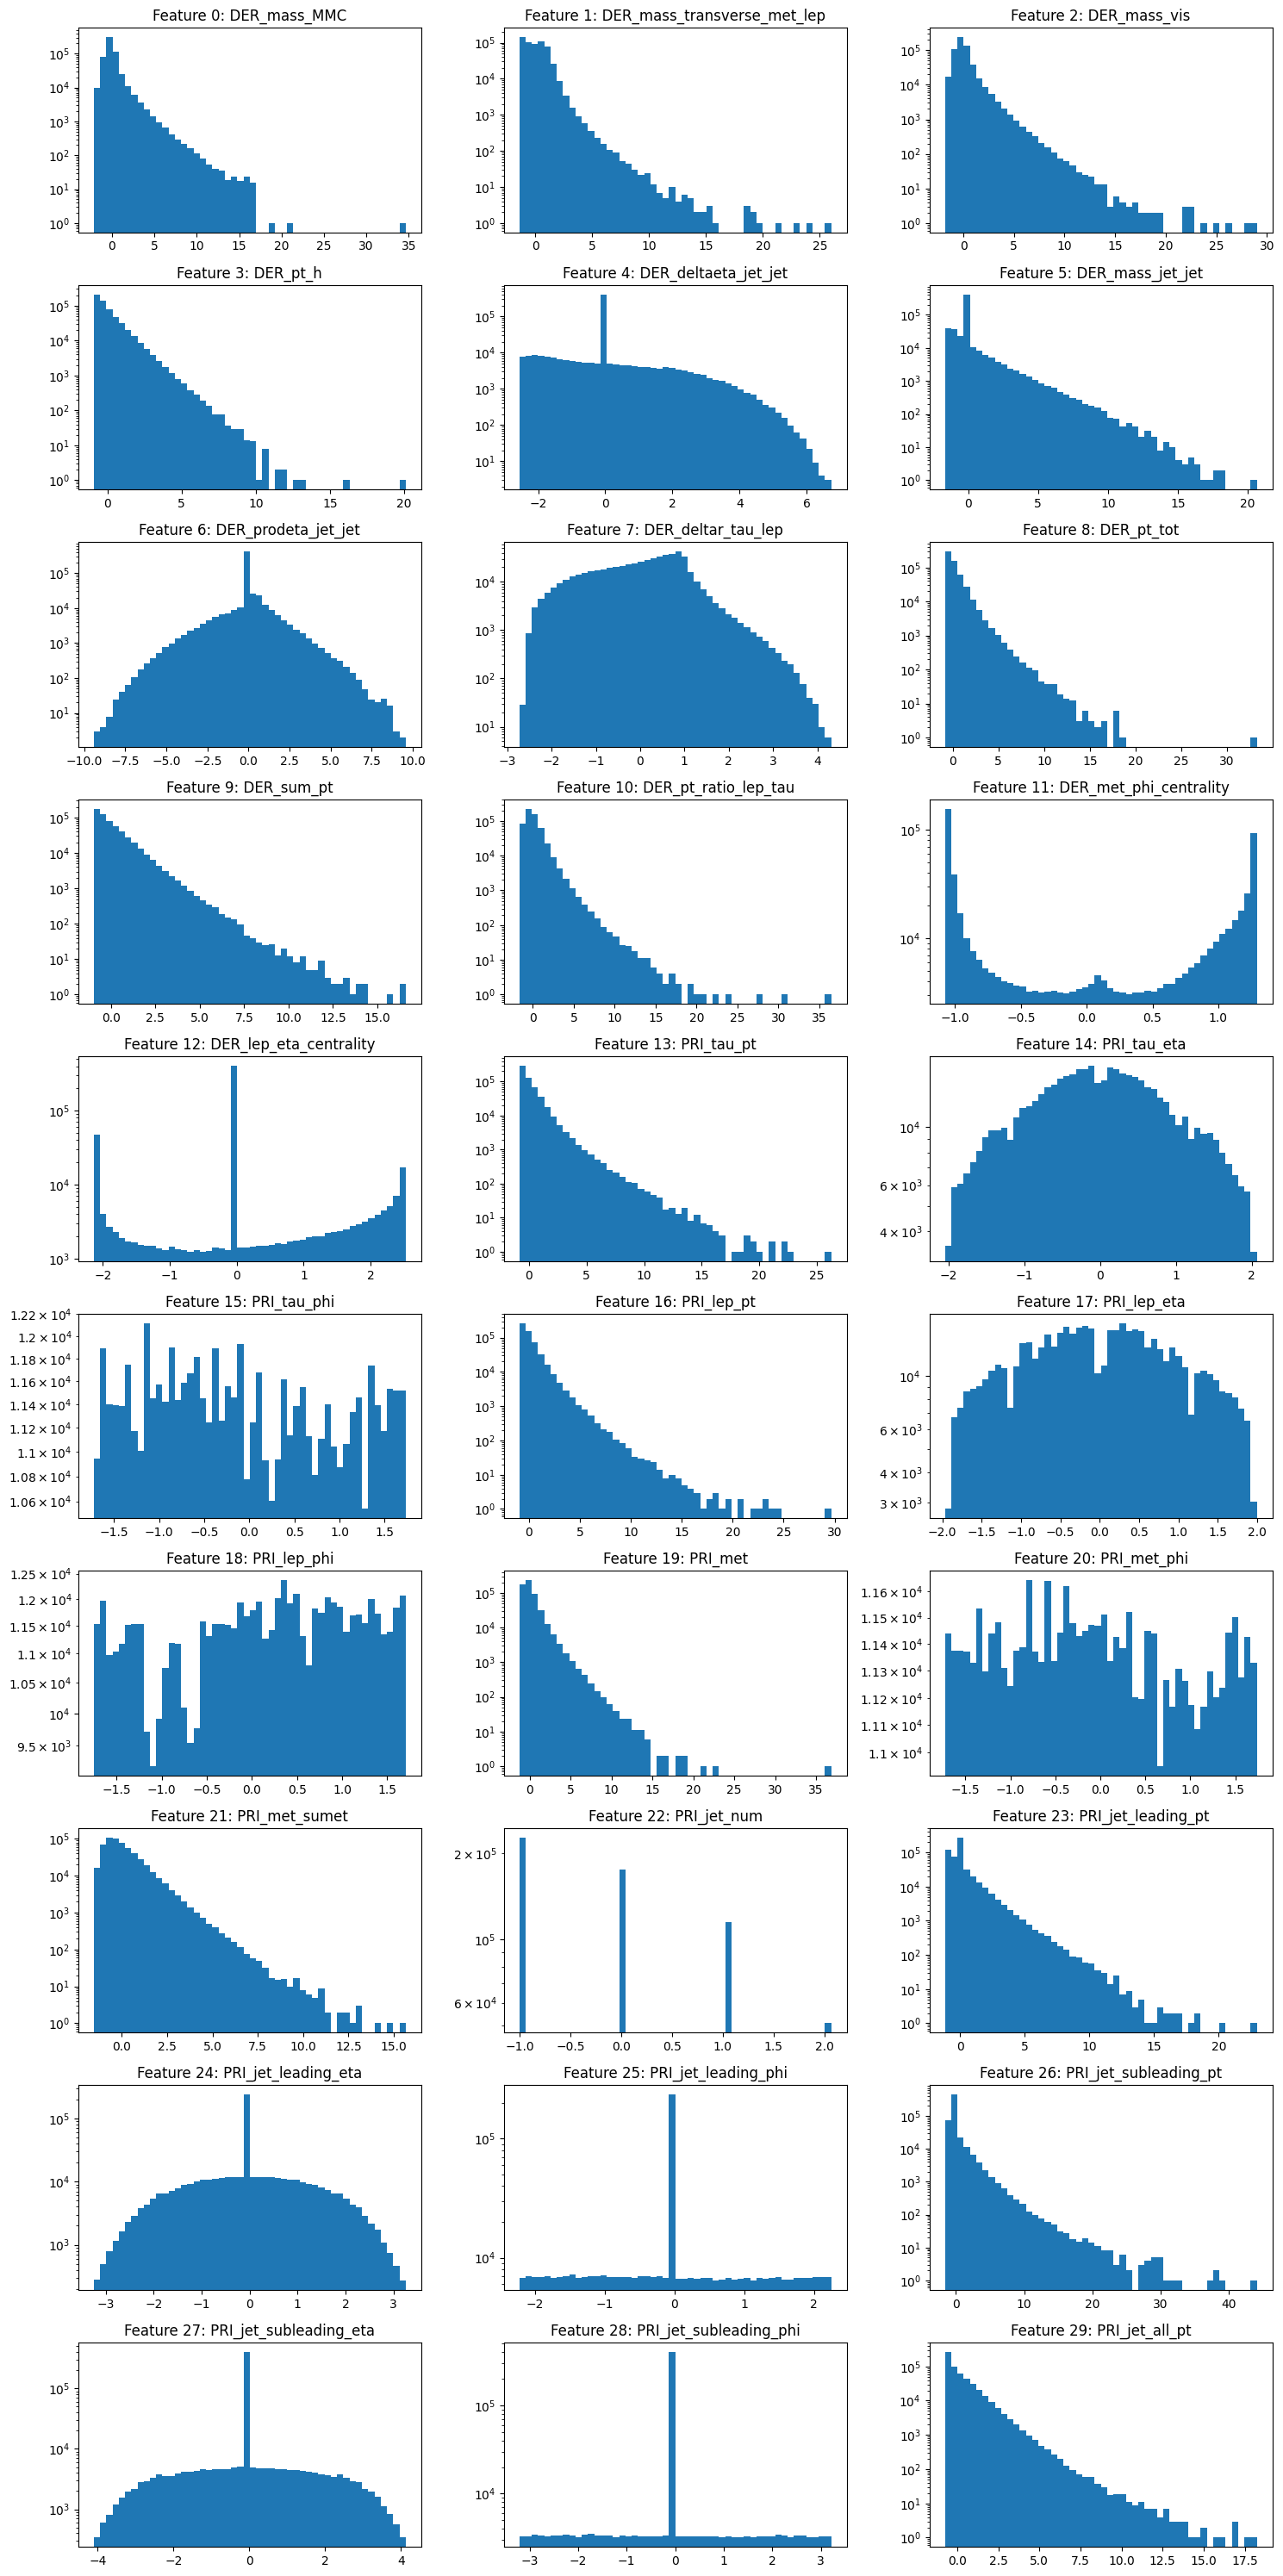

In [80]:
plot_features_distrib(test_data['x_test'][:, 1:])

# Some Insights From Visualizations

We can see that some columns have way too many nan values (-999)
    
    - 4, 5, 6, 12, 24, 25, 27, 28

We should not normalize PRI_jet_num (22), but do one-hot encoding

Some features have bimodal distribution and many have right-skewed distribution

For Bimodal Distribution, we can use Gaussian Mixture Model to separate them (idk how hard is it to implement)

For Skewed Distribution, we can do log transformation or remove outliers and etc.

In [117]:
# remove outliers
outlier_cols = [0, 1, 2, 3, 5, 8, 10, 13, 16, 19, 21, 23, 26, 29]
mask = remove_outliers(tr_data["x_train"], outlier_cols)
tr_data["x_train"] = tr_data["x_train"][mask]
tr_data["y_train"] = tr_data["y_train"][mask]

In [118]:
print(tr_data["x_train"].shape)

(222126, 30)


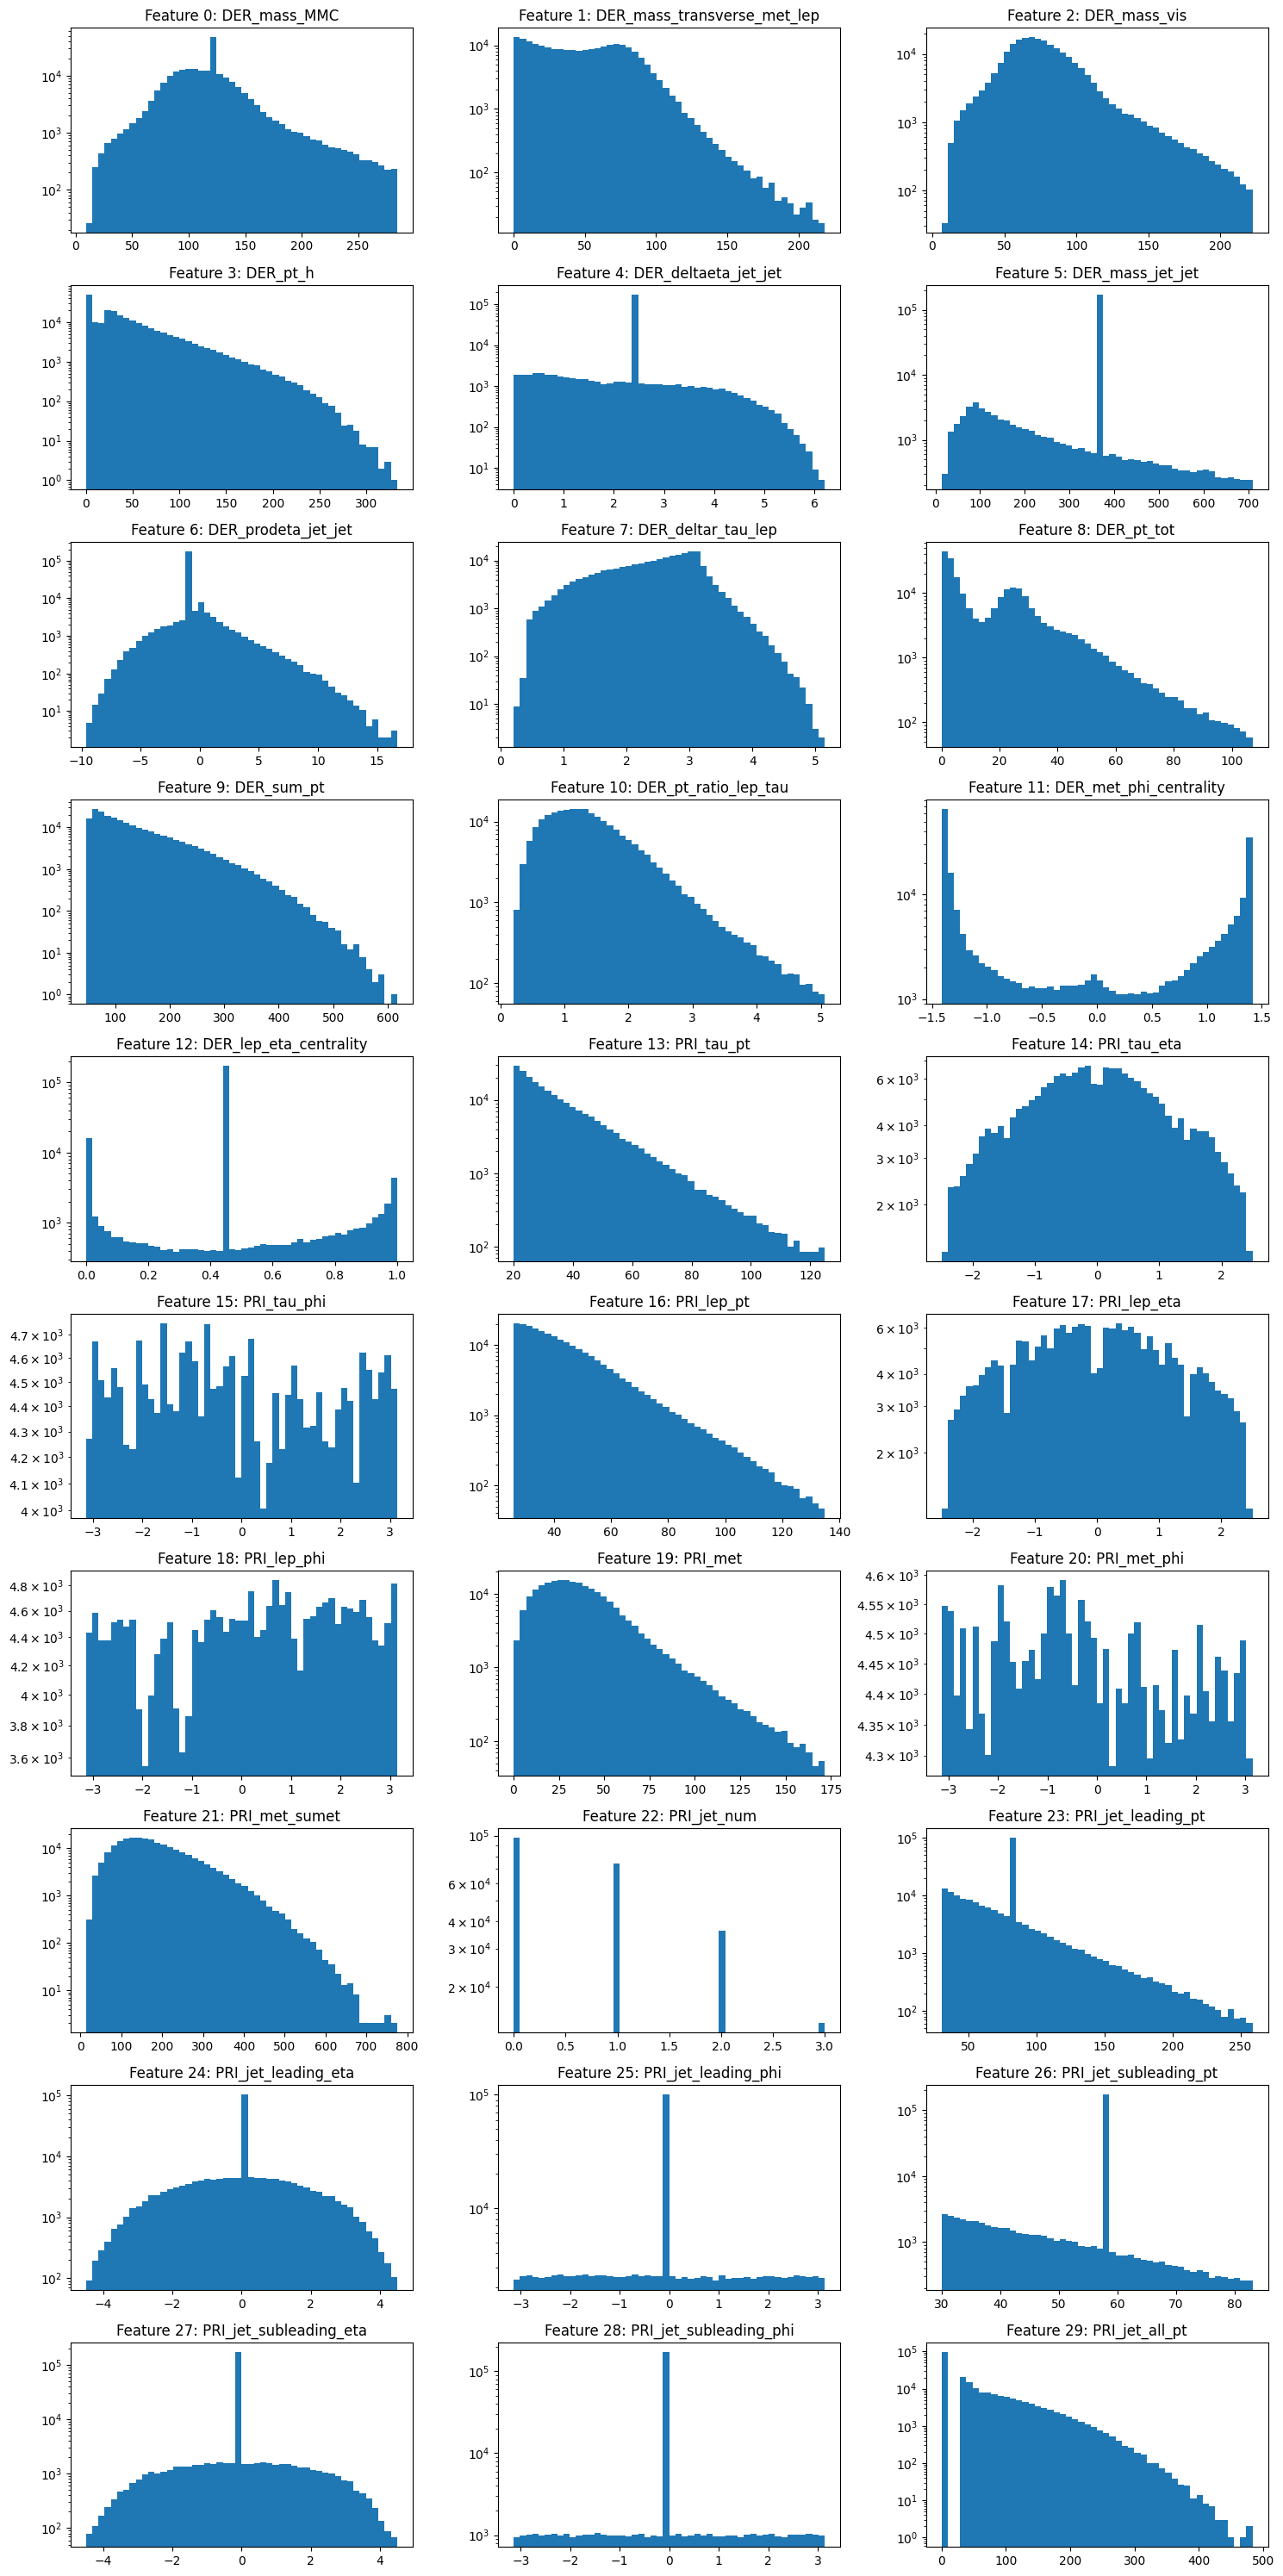

In [99]:
plot_features_distrib(tr_data['x_train'][:, :])

In [119]:
outlier_cols = [0, 1, 2, 3, 5, 8, 10, 13, 16, 19, 21, 23, 26, 29]

new_data = log_transform(tr_data["x_train"], outlier_cols)


../core/data_preprocessing.py:102: RuntimeWarning: divide by zero encountered in log10
  # impute nan values


In [112]:
print(new_data.shape)

(222126, 30)


ValueError: supplied range of [-inf, 5.386314507512671] is not finite

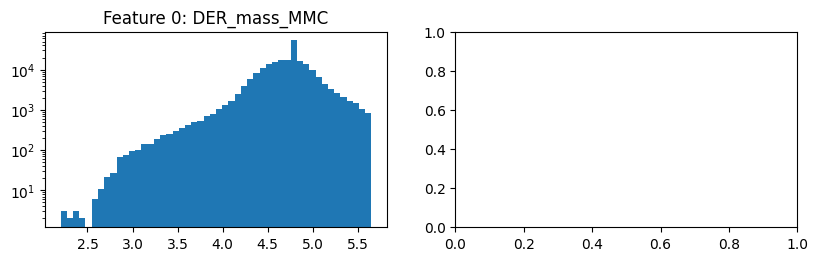

In [113]:
plot_features_distrib(new_data[:, :])

# Visualize according to jet_num

In [60]:
column = 22
def get_masks(X, column):
    zero_jet_mask = X[:, column] == 0
    one_jet_mask = X[:, column] == 1
    many_jet_mask = X[:, column] > 1
    return zero_jet_mask, one_jet_mask, many_jet_mask

tr_data, test_data = dataloader(data_path)

In [61]:
zero_jet_mask, one_jet_mask, many_jet_mask = get_masks(tr_data["x_train"], column)
tr_zero = tr_data["x_train"][zero_jet_mask].astype(np.float64)
tr_one = tr_data["x_train"][one_jet_mask].astype(np.float64)
tr_many = tr_data["x_train"][many_jet_mask].astype(np.float64)

zero_jet_mask1, one_jet_mask1, many_jet_mask1 = get_masks(test_data["x_test"], column)
test_zero = test_data["x_test"][zero_jet_mask1].astype(np.float64)
test_one = test_data["x_test"][one_jet_mask1].astype(np.float64)
test_many = test_data["x_test"][many_jet_mask1].astype(np.float64)

# replace -999 to nan
nan_imputer = Imputer(missing_values=-999, strategy='constant', fill_value=np.nan)
tr_zero = nan_imputer.fit_transform(tr_zero)
test_zero = nan_imputer.transform(test_zero)

nan_imputer1 = Imputer(missing_values=-999, strategy='constant', fill_value=np.nan)
tr_one = nan_imputer1.fit_transform(tr_one)
test_one = nan_imputer1.transform(test_one)

nan_imputer2 = Imputer(missing_values=-999, strategy='constant', fill_value=np.nan)
tr_many = nan_imputer2.fit_transform(tr_many)
test_many = nan_imputer2.transform(test_many)

# impute nan values
mean_imputer1 = Imputer(missing_values=np.nan, strategy='mean', axis=0)
tr_zero = mean_imputer1.fit_transform(tr_zero)
test_zero = mean_imputer1.transform(test_zero)

mean_imputer2 = Imputer(missing_values=np.nan, strategy='mean', axis=0)
tr_one = mean_imputer2.fit_transform(tr_one)
test_one = mean_imputer2.transform(test_one)

mean_imputer3 = Imputer(missing_values=np.nan, strategy='mean', axis=0)
tr_many = mean_imputer3.fit_transform(tr_many)
test_many = mean_imputer3.transform(test_many)

In [62]:
print(tr_zero.shape)
print(np.all(np.isnan(tr_zero)))
print(np.all(np.isfinite(tr_zero)))

(99913, 30)
False
False


ValueError: autodetected range of [nan, nan] is not finite

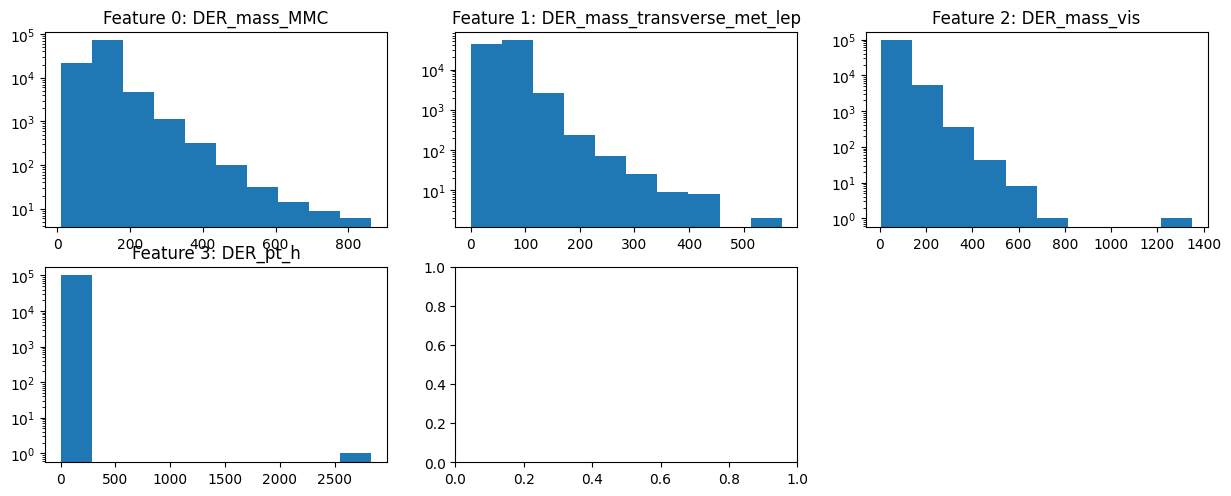

In [63]:
plot_features_distrib(tr_zero)

ValueError: autodetected range of [nan, nan] is not finite

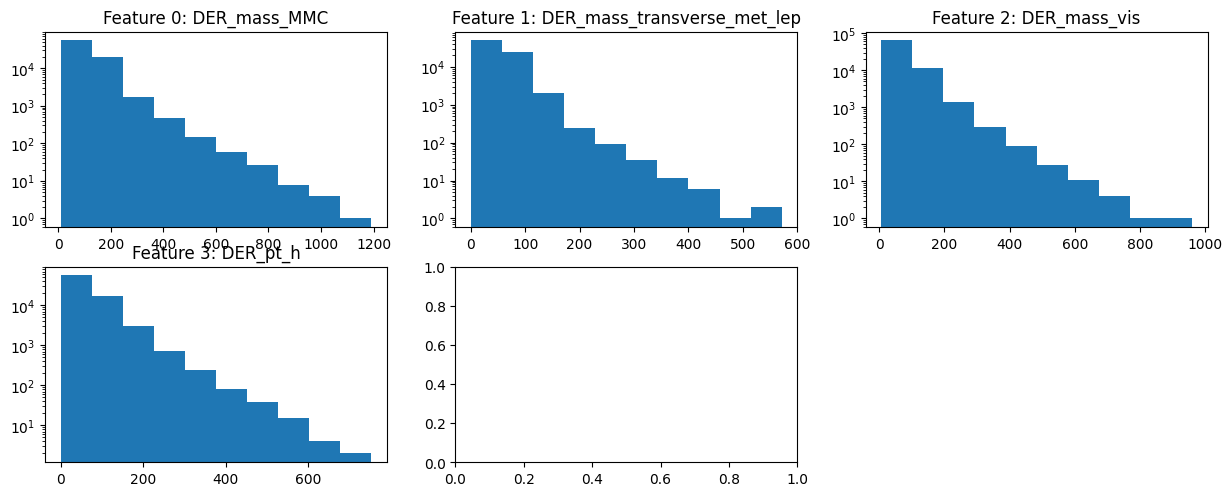

In [59]:
plot_features_distrib(tr_one[:, :])

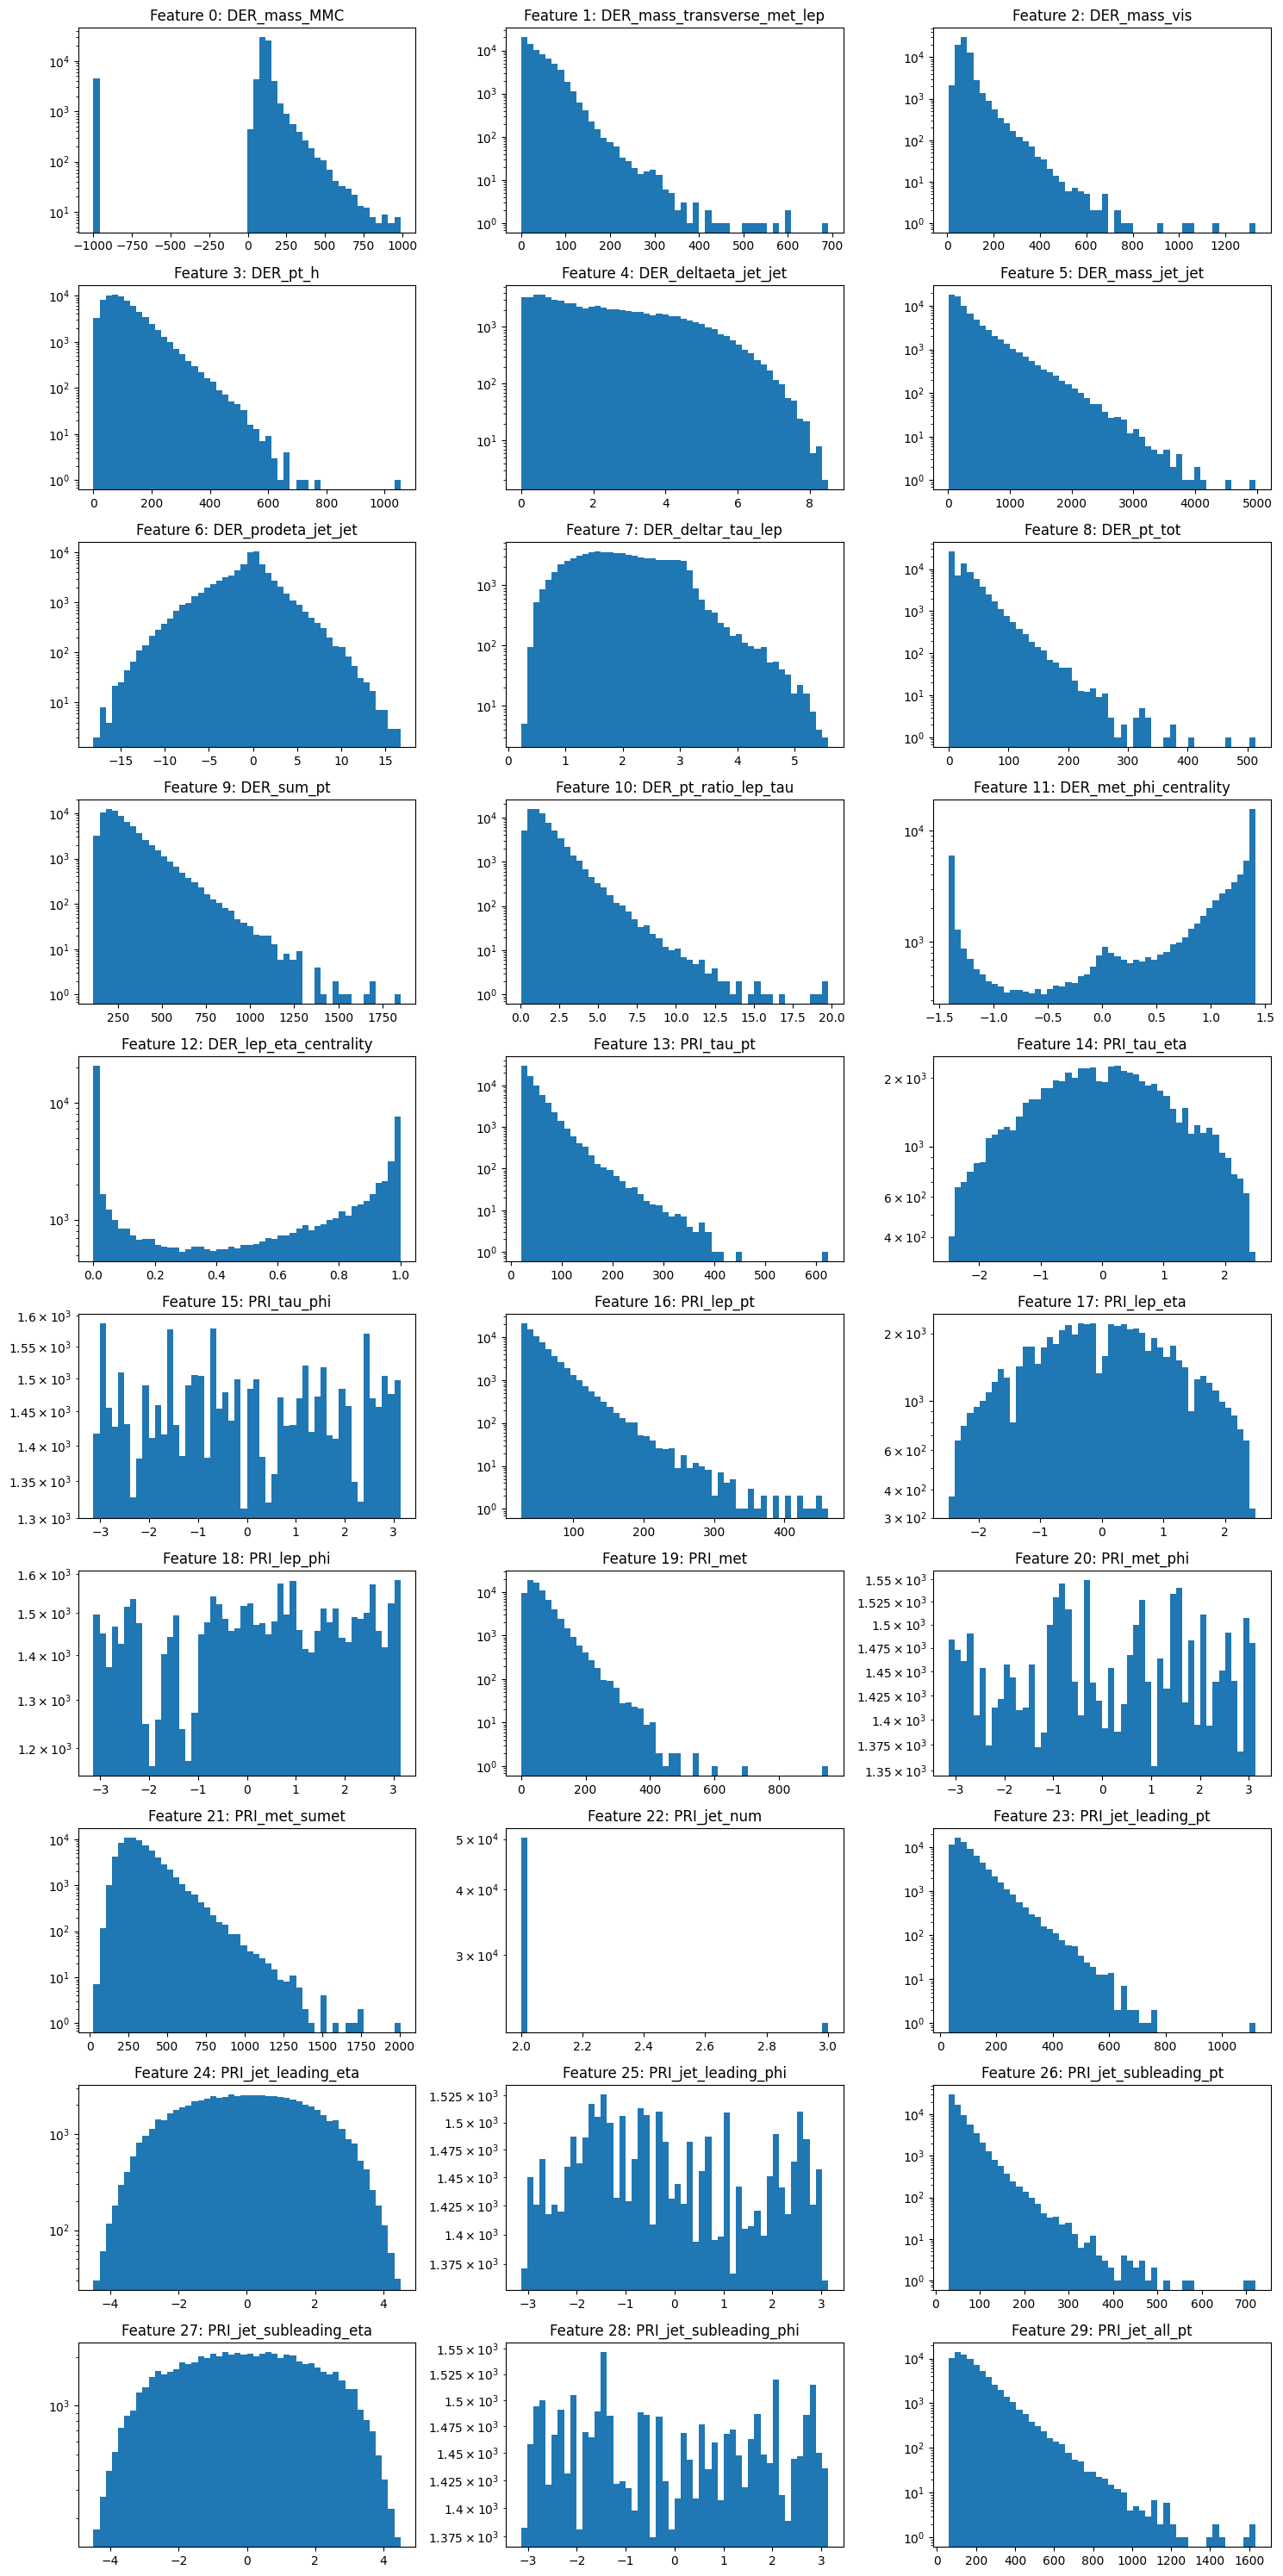

In [39]:
plot_features_distrib(tr_many[:, :])

In [ ]:
plot_features_distrib(tr_zero[:, :])